In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import math
from typing import List, Tuple, Union, Optional
from collections import defaultdict
import torch
import scipy.stats as stats
from typing import Callable

# Problem 1

We have $$\bar{X}(N) = \frac{1}{N} \sum_{i=1}^N X_i, \quad X_i \sim \mathrm{Uniform}(0, 1)$$
and $$\hat{X}(N) = \text{median}(X_1, \dots, X_N), \quad X_i \sim \mathrm{Uniform}(0, 1)\;.$$

We analytically derived that both estimates should converge to $0.5$. However, because we observed two different variance convergence rates, we now wish to empirically verify the dervied convergence rate. 

In [2]:
# seed the generator
SEED = 42
np.random.seed(SEED)

NUM_RUNS = 50
NUM_SAMPLES = 1000

In [3]:
def X_bar(_X):
    return np.mean(_X)

def X_hat(_X):
    return np.median(_X)

### $\bar{X}(N)$

In [4]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_bar(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(50, 1000)

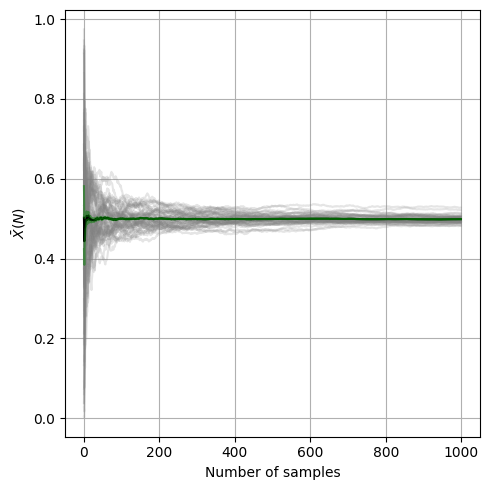

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_36506/2464779465.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


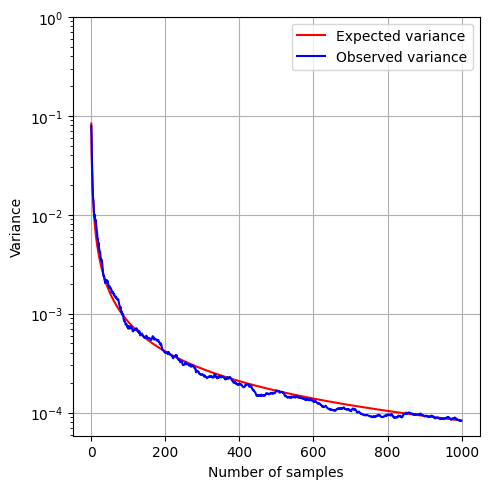

In [6]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 12.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [7]:
means_bar = means.copy()
expected_variance_bar = X.copy()
variance_bar = variances.copy()

### $\hat{X}(N)$

In [8]:
# seed the generator
np.random.seed(SEED)

run_results = []

for run in range(NUM_RUNS):
    X = np.random.uniform(0, 1, size=NUM_SAMPLES)
    run_result = []

    for N in range(1, NUM_SAMPLES+1):
        X_bar_estimate = X_hat(X[:N])
        run_result.append(X_bar_estimate)
    
    run_results.append(run_result)

run_results = np.array(run_results)
run_results.shape

(50, 1000)

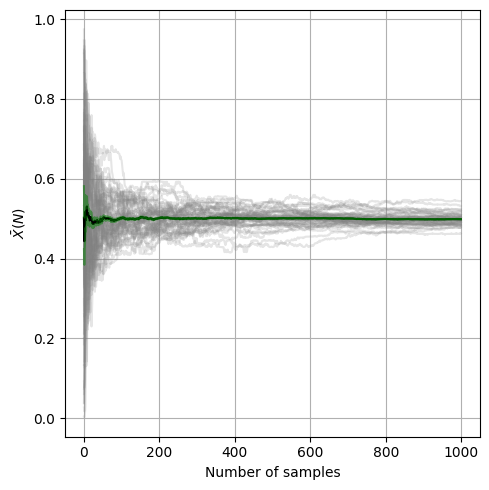

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

# compute the mean of all runs
means = np.mean(run_results, axis=0)

# compute the variance of all runs
variances = np.var(run_results, axis=0)
# print(variances.shape)

# plot the individual runs
for rid in range(run_results.shape[0]):
    ax.plot(run_results[rid], label=f'Run', c='gray', alpha=0.2)

ax.plot(means, label='Mean', c='black')
ax.plot(means+variances, label='Variance', c='green', alpha=0.5)
ax.plot(means-variances, label='Variance', c='green', alpha=0.5)

ax.set_xlabel('Number of samples')
ax.set_ylabel('$\\bar{X}(N)$')
ax.grid(True)

fig.tight_layout()

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_36506/2958123404.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 1)


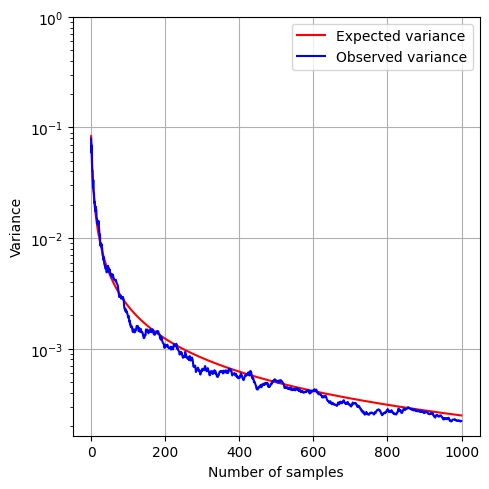

In [10]:
X = np.linspace(1, NUM_SAMPLES, NUM_SAMPLES) * 4
X += 8.0
X = 1.0 / X

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X, label='Expected variance', c='red')
ax.plot(variances, label='Observed variance', c='blue')
ax.legend()

ax.grid(True)
ax.set_xlabel('Number of samples')
ax.set_ylabel('Variance')

ax.set_yscale('log')
ax.set_ylim(0, 1)

fig.tight_layout()


In [11]:
means_hat = means.copy()
expected_variance_hat = X.copy()
variance_hat = variances.copy()

### Compare

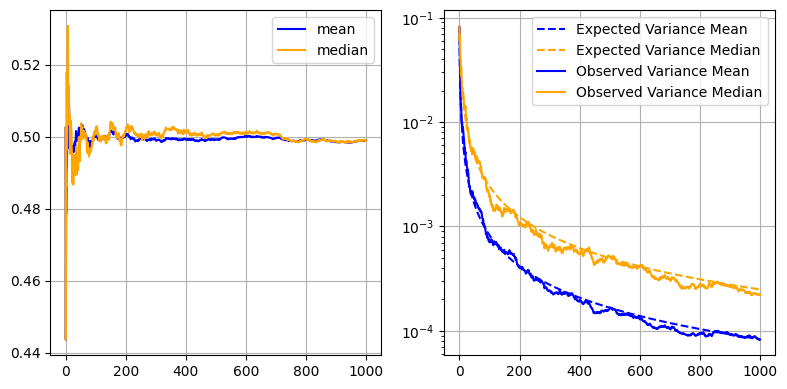

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))


ax[0].plot(means_bar, label="mean", c='blue',)
ax[0].plot(means_hat, label="median", c='orange')

ax[0].legend()
ax[0].grid(True)

ax[1].plot(expected_variance_bar, label="Expected Variance Mean", c='blue', linestyle='--')
ax[1].plot(expected_variance_hat, label="Expected Variance Median", c='orange', linestyle='--')
ax[1].plot(variance_bar, label="Observed Variance Mean", c='blue')
ax[1].plot(variance_hat, label="Observed Variance Median", c='orange')


ax[1].legend()
ax[1].grid(True)

# log y axis
ax[1].set_yscale('log')
fig.tight_layout()


**Remark**

We clearly observe that the observed variances match the equations that we derived analytically. Furthermore, We clearly observe, that the mean estimation has a better estimation of the expectation of $X$, as not only are the means higher in the median estimator, but the variance of the mean estimator is also lower than the median estimator

## Test

In [13]:
P_B = np.array([
    [0.0,   0.095, 0.905],
    [0.255, 0.0,   0.745],
    [0.745, 0.255, 0.0]
])
P_A = np.array([
    [0.0,   0.495, 0.505],
    [0.505, 0.0,   0.495],
    [0.495, 0.505, 0.0]
])
P_square = P_B @ P_B
# P.dot(P)
P_ABB = P_A @ P_B @ P_B
pi = np.array([1.0, 1.0, 1.0]) / 3.0
true_pi = np.array([0.4429338863, 0.1743405141, 0.3827255994])
pi_A = true_pi @ P_A
pi_AB = pi_A @ P_B
pi_ABB = pi_AB @ P_B
pi_ABB 

array([0.44293388, 0.17434051, 0.38272561])

In [14]:
# steps = 1000
# for step in range(steps):
#     pi = pi @ P_ABB_conv

# print(pi)

# Problem 2
## (c)

In [15]:
## Monte Carlo
class Environment:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

    def step(self) -> int:
        if self.state == 0:
            if np.random.rand() <= 0.095:
                self.capital += 1
            else:
                self.capital -= 1
        else:
            if np.random.rand() <= 0.745:
                self.capital += 1
            else:
                self.capital -= 1

        self.compute_state()

        return self.capital

In [16]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = Environment(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

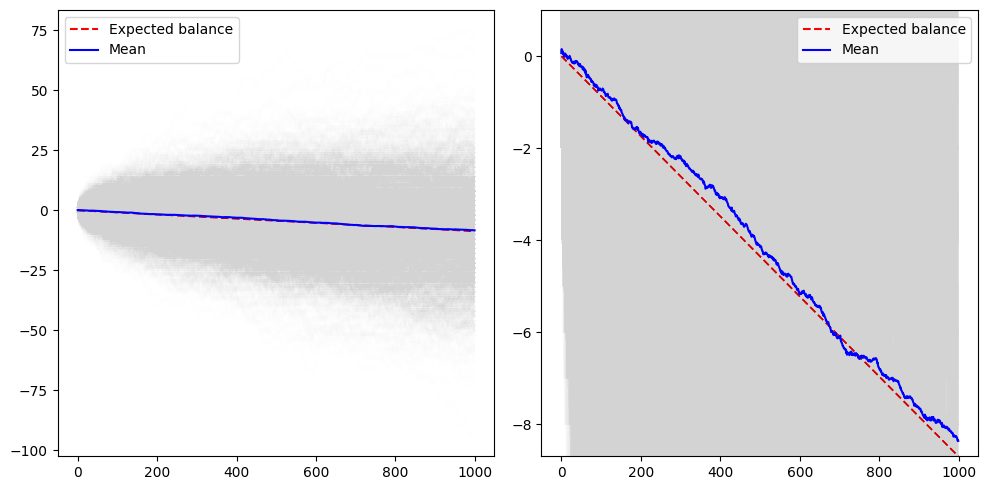

In [17]:
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * (-0.0086952867)

# min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(expected_delta.min(), 1)

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper right")

fig.tight_layout()


### (d)

In [18]:
## Monte Carlo
class EnvironmentCombined:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

    def step(self) -> int:
        if self.state == 0:
            if np.random.rand() <= 0.295:
                self.capital += 1
            else:
                self.capital -= 1
        else:
            if np.random.rand() <= 0.62:
                self.capital += 1
            else:
                self.capital -= 1

        self.compute_state()

        return self.capital

In [19]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = EnvironmentCombined(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

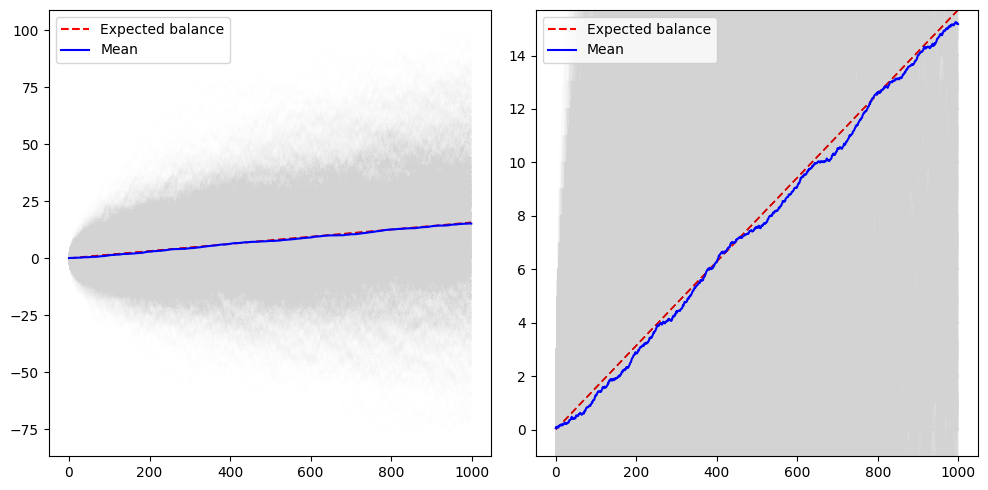

In [20]:
expected_gain_each_step = 0.01570422535
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * expected_gain_each_step

min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue')
ax[1].plot(means, label="Mean", c='blue')

# zoom in on the y axis
ax[1].set_ylim(-1, expected_delta.max())

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.tight_layout()


### (e)

In [21]:
## Monte Carlo
class EnvironmentABB:
    def __init__(self, capital: int = 1):
        self.capital: int = capital
        self.state: int = None
        self.steps: int = 0

        self.compute_state()

    def compute_state(self):
        self.state = self.capital % 3

        if self.steps > 2:
            self.steps = 0


    def step(self) -> int:
        # Play game A
        if self.steps == 0:
            if np.random.rand() <= 0.495:
                self.capital += 1
            else:
                self.capital -= 1

        # play game B
        else:
            if self.state == 0:
                if np.random.rand() <= 0.095:
                    self.capital += 1
                else:
                    self.capital -= 1
            else:
                if np.random.rand() <= 0.745:
                    self.capital += 1
                else:
                    self.capital -= 1


        self.steps += 1

        self.compute_state()

        return self.capital

In [22]:
NUM_STEPS = 1000

CAPITAL_RANGE = range(1, 31)

np.random.seed(SEED)
all_deltas = []
for run in range(NUM_RUNS):
    for capital in CAPITAL_RANGE:
        env = EnvironmentABB(capital=capital)

        deltas = []

        for step in range(NUM_STEPS):
            new_capital = env.step()

            delta = new_capital - capital
            deltas.append(delta)

        all_deltas.append(deltas)

all_deltas = np.array(all_deltas)
all_deltas.shape


(1500, 1000)

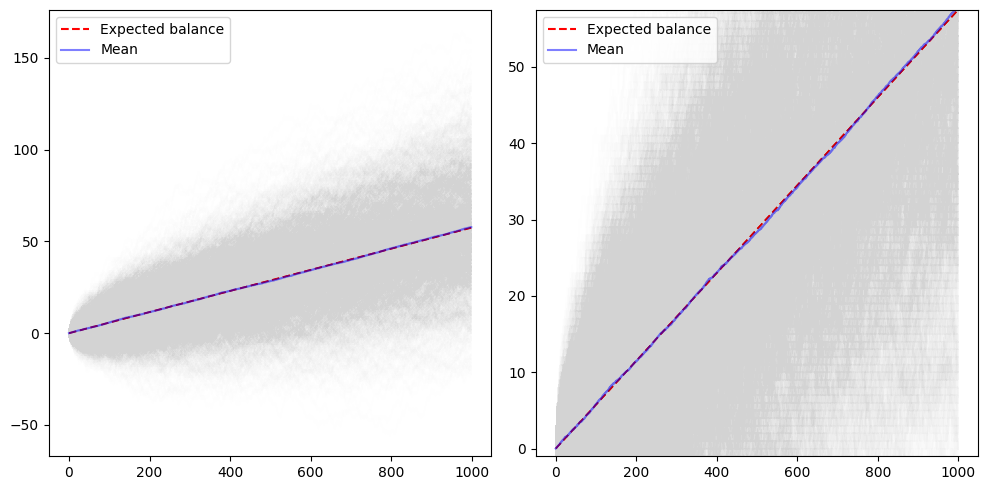

In [25]:
# This could be also computed for each round, yielding a better local expected gain. 
# However, after three rounds, both are equivalent. 
# Furthermore, on the scale on which we compute the reward, we doubt that it makes a significant difference.
expected_gain_each_step = 0.172292479/3.0  
expected_delta = np.linspace(0, NUM_STEPS, NUM_STEPS) * expected_gain_each_step

min_offset = min(np.min(all_deltas), np.min(expected_delta))

means = np.mean(all_deltas, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
ax[1].plot(expected_delta, label="Expected balance", c='red', linestyle='--')
for run in range(all_deltas.shape[0]):
    ax[0].plot(all_deltas[run], c='lightgray', alpha=0.002)
    ax[1].plot(all_deltas[run], c='lightgray', alpha=0.002)

ax[0].plot(means, label="Mean", c='blue', alpha=0.5)
ax[1].plot(means, label="Mean", c='blue', alpha=0.5)

# zoom in on the y axis
ax[1].set_ylim(-1, expected_delta.max())

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.tight_layout()


# Problem 3

### (a)

In [26]:
df = pd.read_csv('./human.csv')
df.head(5)

,sequence,annotations
0,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...,0011111111111111111111100000000000000000000000...
1,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...,0000111111111111111111111000000000000000000000...
2,MRWQEMGYIFYPRKLR,0000000000000000
3,MTQRAGAAMLPSALLLLCVPGCLTVSGPSTVMGAVGESLSVQCRYE...,0000000000000000000000000000000000000000000000...
4,MGDQPCASGRSTLPPGNAREAKPPKKRCLLAPRWDYPEGTPNGGST...,0000000000000000000000000000000000000000000000...


In [27]:
def protein_to_int(string: str) -> [int]:
    return [ord(c) - ord('A') for c in string]

def label_to_int(string: str) -> [int]:
    return [int(c) for c in string]

In [28]:
# map the sequences to integers
df['sequence'] = df['sequence'].apply(protein_to_int)
df['annotations'] = df['annotations'].apply(label_to_int)

In [29]:
# split into train and test set (80/20)
df_shuffle = df.sample(frac=1).reset_index(drop=True)

split_index = int(len(df_shuffle) * 0.8)
df_train = df_shuffle.iloc[:split_index]
df_test = df_shuffle.iloc[split_index:]

df_train.shape, df_test.shape

((14767, 2), (3692, 2))

In [30]:
class HiddenMarkovModel:
    def __init__(self, num_hidden_states: int, num_observed_states: int):
        self.num_states_hidden: int = num_hidden_states
        self.num_states_observed: int = num_observed_states

        self.hidden_state: int | None = None
        self.observed_state: int | None = None
        self.pi: np.ndarray = None

        self.transition_matrix: np.ndarray = None


class MonteCarloHDD(HiddenMarkovModel):
    def __init__(self, num_hidden_states: int, num_observed_states: int):
        super().__init__(num_hidden_states, num_observed_states)

        self.transition_matrix = np.zeros((self.num_states_hidden, self.num_states_hidden), dtype=np.float64)
        self.emission_matrix = np.zeros((self.num_states_hidden, self.num_states_observed), dtype=np.float64)
        self.pi = np.zeros(self.num_states_hidden, dtype=np.float64)

    def learn_step(self, hidden_state: int, observed_state: int):
        # increment the number of observations
        if self.hidden_state is not None:
            self.transition_matrix[self.hidden_state, hidden_state] += 1    
        else:
            self.pi[hidden_state] += 1    
        self.emission_matrix[hidden_state, observed_state] += 1

        self.hidden_state = hidden_state
        self.observed_state = observed_state

    def reset_sequence(self):
        self.hidden_state = None
        self.observed_state = None

    def formalize_probabilities(self):
        transition_matrix_sum_rows = np.sum(self.transition_matrix, axis=1)
        for row in range(len(transition_matrix_sum_rows)):
            self.transition_matrix[row, :] = self.transition_matrix[row, :] / transition_matrix_sum_rows[row]

        emission_matrix_sum_rows = np.sum(self.emission_matrix, axis=1)
        for row in range(len(emission_matrix_sum_rows)):
            self.emission_matrix[row, :] = self.emission_matrix[row, :] / emission_matrix_sum_rows[row]

        self.pi = self.pi / np.sum(self.pi)



In [31]:
alphabet = set()

for index, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Computing mapping of alphabet to integer"):
    for state in row['sequence']:
        alphabet.add(state)
        
alphabet = list(alphabet)
alphabet.sort()
alphabet_mapping = {state: i for i, state in enumerate(alphabet)}
alphabet, len(alphabet)

Computing mapping of alphabet to integer: 100%|██████████| 14767/14767 [00:00<00:00, 49631.94it/s]


([0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24],
 21)

In [32]:
# feed the data
MC_HMM = MonteCarloHDD(num_hidden_states=2, num_observed_states=21)

for index, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Estimating the parameters of the Hidden Markov Model"):
    # ensure that the sequence is reset
    MC_HMM.reset_sequence()

    for step in range(len(row['sequence'])):
        # print(row['sequence'][step], row['annotations'][step])
        MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

MC_HMM.formalize_probabilities()

Estimating the parameters of the Hidden Markov Model: 100%|██████████| 14767/14767 [00:09<00:00, 1531.95it/s]


In [33]:
MC_HMM.transition_matrix, MC_HMM.emission_matrix, MC_HMM.pi

(array([[0.99832151, 0.00167849],
        [0.04647815, 0.95352185]]),
 array([[6.92669017e-02, 2.23936979e-02, 4.92535073e-02, 7.39929258e-02,
         3.40816938e-02, 6.58905677e-02, 2.67159356e-02, 4.09576305e-02,
         5.92171870e-02, 9.53739645e-02, 2.05869616e-02, 3.65882784e-02,
         6.45684715e-02, 4.90439625e-02, 5.81043945e-02, 8.45869269e-02,
         5.38760242e-02, 2.40994575e-06, 5.75039565e-02, 1.17032990e-02,
         2.62913032e-02],
        [9.52731606e-02, 2.75704407e-02, 8.26075605e-03, 9.90085754e-03,
         9.30841272e-02, 7.07653584e-02, 9.77701314e-03, 1.00655371e-01,
         8.26745035e-03, 1.96233122e-01, 3.22564449e-02, 1.69867654e-02,
         2.61914166e-02, 1.18589379e-02, 9.77031885e-03, 5.91039021e-02,
         4.90992830e-02, 0.00000000e+00, 1.16571050e-01, 2.19639713e-02,
         3.64102530e-02]]),
 array([0.99864563, 0.00135437]))

### (b)

In [34]:
# Based on the code presented in the lecture
def viterbi_max_x(
    y: [int],          
    HMM: HiddenMarkovModel               
) -> (float, [int]):
    N = len(HMM.transition_matrix)
    T = len(y)
    # print("N:", N, "T:", T)
    
    # transform to log space (add small epsilon to avoid log(0))
    epsilon = 1e-300  # Very small value to avoid log(0) warnings
    log_transition_matrix = np.log(np.maximum(HMM.transition_matrix, epsilon))
    log_emission_matrix = np.log(np.maximum(HMM.emission_matrix, epsilon))
    log_pi = np.log(np.maximum(HMM.pi, epsilon))
    logDelta = [[-math.inf] * N for _ in range(T)]

    # initialisation
    for j in range(N):
        logDelta[0][j] = log_pi[j] + log_emission_matrix[j][y[0]]
    
    # recursion (Forward)
    for t in range(1, T):
        for j in range(N):
            best = max(logDelta[t-1][i] + log_transition_matrix[i][j] for i in range(N))    
            logDelta[t][j] = best + log_emission_matrix[j][y[t]]

    logDelta = np.array(logDelta)
    # print(logDelta)

    # backtracking (backwards)
    logDelta_difference = np.zeros_like(logDelta) 
    logDelta_difference[:-1] = logDelta[1:]
    logDelta_difference =  logDelta_difference - logDelta

    # print(logDelta_difference)
    # print(np.concatenate([logDelta, logDelta_difference], axis=1)[-10:])

    # print("A:")
    # print(log_transition_matrix)

    current_state = np.argmax(logDelta[T-1]).item()
    output_state_sequence = [current_state]
    # print('initial state', current_state)
    for t in range(T-1, 0, -1):
        
        # get the most likely previous state
        # print("logDelta[T-1]", logDelta[t])
        # print(f"t={t}, current_state={current_state}")

        # print('logDelta[t-1]:', logDelta[t-1])
        # for state in range(N):
        #     print(f"state={state}")
        #     most_likely_previous_state = np.argmax(log_transition_matrix.T[state] + logDelta[t-1])

        #     print(f'\tA.T[state]:', log_transition_matrix.T[state])
        #     print('\tlog_transition_matrix.T[current_state] + logDelta[t-1]:', log_transition_matrix.T[state] + logDelta[t-1])
        #     print("\tmost_likely_previous_state:", most_likely_previous_state)
        #     print('\tEmission matrix:', log_emission_matrix[:, y[t]])
        most_likely_previous_state = np.argmax(log_transition_matrix.T[current_state] + logDelta[t-1]).item()
        # print('log_transition_matrix.T[current_state] + logDelta[t-1]:', log_transition_matrix.T[current_state] + logDelta[t-1])
        # print("most_likely_previous_state:", most_likely_previous_state)
        # print('Emission matrix:', log_emission_matrix[:, y[t]])

        current_state = most_likely_previous_state
        output_state_sequence.append(current_state)

        # print('Emission matrix:', log_transition_matrix.T[current_state] + logDelta[t-1] + log_emission_matrix[j][y[t]])
        # for state in range(N):
        #     print('State:', state)
        #     print(f'\tb_x(State={state}) = {log_emission_matrix[state][y[t]]}')
        #     print(f'\tmax(State={state}) = {np.max(logDelta[t-1] - log_transition_matrix.T[state])}')
        #     print(f'\targ max(State={state}) = {np.argmax(logDelta[t-1] - log_transition_matrix.T[state])}')
        #     # print(f'\tmax(State={state}) = {logDelta[t-1][state] + log_emission_matrix[state][y[t]]}')
        #     print(f'\tdelta_t(State={state}) = {np.max(log_transition_matrix.T[state] + (logDelta[t-1] - log_emission_matrix[state][y[t]]))}')
        #     print(f'\targ max delta_t(State={state}) = {np.argmax(log_transition_matrix.T[state] + (logDelta[t-1] - log_emission_matrix[state][y[t]]))}')
        # break

    return max(logDelta[T-1]), np.array(output_state_sequence[::-1])


In [35]:
def accuracy(seq: np.ndarray, annotation: np.ndarray) -> float:
    return np.sum(seq.reshape(-1) == annotation.reshape(-1)) / len(seq.reshape(-1))

def scores(seq: np.ndarray, ground_truth: np.ndarray, classes: list[int] = None) -> Tuple[List[float], List[float], List[float], List[float]]:
    TP: List[float] = []
    FP: List[float] = []
    TN: List[float] = []
    FN: List[float] = []

    # Classes to consider: union of both in annotation and prediction to match sklearn
    # classes = np.unique(np.concatenate([ground_truth, seq]))
    for value in classes:
        pred_is_value = (seq == value)
        # print('pred_is_value:', pred_is_value)
        true_is_value = (ground_truth == value)

        TP.append(np.sum(pred_is_value & true_is_value))
        FP.append(np.sum(pred_is_value & ~true_is_value))
        FN.append(np.sum(~pred_is_value & true_is_value))
        TN.append(np.sum(~pred_is_value & ~true_is_value))

    return TP, FP, TN, FN

def precision(seq: np.ndarray, annotation: np.ndarray, collapse: str = 'micro', unique_values=None) -> float:
    """
    collapse: which algorithm to average the precision and recall over

    'micro': globally compute: sum TP / (sum TP + sum FP)
    'macro': unweighted mean of classwise precision
    'weighted': mean of classwise precision weighted by support in ground truth
    """

    TP, FP, TN, FN = scores(seq, annotation, unique_values)
    TP = np.array(TP, dtype=float)
    FP = np.array(FP, dtype=float)
    symbol_counts = np.array([(annotation == c).sum() for c in unique_values])

    epsilon = 1e-200

    match collapse:
        case 'micro':
            TP = TP.sum()
            FP = FP.sum()
            denom = TP + FP
            if denom == 0:
                return 0.0
            return float(TP / denom)

        case 'macro':
            # We have to ignore the cases where the TP+FP is zero, as setting it to zero (as usually defined when dividing by zero for precision computation) is too harsh here...
            # I googled and found this solution, which is quite slick in my opinion
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP + epsilon), np.nan)
            return float(np.nanmean(class_precisions))  # nanmean ignores NaN values

        case 'weighted':
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP + epsilon), 0.0)
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (symbol_counts / symbol_sum)))

        case 'weighted_inverse':
            class_precisions = np.where((TP + FP) > 0, TP / (TP + FP), 0.0)
            # support weights from annotation (ground truth); avoids division by zero
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (1.0 - (symbol_counts / symbol_sum))))

        case _:
            raise ValueError(f"Invalid collapse value: {collapse}")
        
def recall(seq: np.ndarray, annotation: np.ndarray, collapse: str = 'micro', unique_values=None) -> float:
    """
    collapse: which algorithm to average the precision and recall over

    'micro': globally compute: sum TP / (sum TP + sum FN)
    'macro': unweighted mean of classwise precision
    'weighted': mean of classwise precision weighted by support in ground truth
    """

    TP, FP, TN, FN = scores(seq, annotation, unique_values)
    TP = np.array(TP, dtype=float)
    FN = np.array(FN, dtype=float)
    # symbol_counts = np.array([(annotation == c).sum() for c in np.unique(np.concatenate([annotation, seq]))])
    symbol_counts = np.array([(annotation == c).sum() for c in unique_values])

    epsilon = 1e-200

    match collapse:
        case 'micro':
            TP = TP.sum()
            FN = FN.sum()
            denom = TP + FN
            if denom == 0:
                return 0.0
            return float(TP / denom)

        case 'macro':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), np.nan)
            return float(np.nanmean(class_precisions))  

        case 'weighted':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), 0.0)
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (symbol_counts / symbol_sum)))

        case 'weighted_inverse':
            class_precisions = np.where((TP + FN) > 0, TP / (TP + FN + epsilon), 0.0)
            # support weights from annotation (ground truth); avoids division by zero
            symbol_sum = symbol_counts.sum()
            if symbol_sum == 0:
                return 0.0
            return float(np.sum(class_precisions * (1.0 - (symbol_counts / symbol_sum))))

        case _:
            raise ValueError(f"Invalid collapse value: {collapse}")

def compute_average_precision_recall_single_sequence(df_test: pd.DataFrame, collapse: Union[str, List[str]], weight: Optional[str] = None, progress_bar: bool = True) -> List[Tuple[float, float]]:
    ground_truths: List[int] = []
    predictions: List[int] = []

    unique_values = defaultdict(int)
    for i, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing the weight of each symbol"):
        for v in test_annotation:
            unique_values[v] += 1
    match weight:
        case None | 'None':
            pass
        case 'weighted' | 'inverse':
            sum_weights = sum(unique_values.values())
            weights = {k: v / sum_weights for k, v in unique_values.items()}
            if weight == 'inverse':
                weights = {k: 1.0 - v for k, v in weights.items()}
        case _:
            raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

    unique_values = list(unique_values.keys())

    for index, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing average precision and recall", disable = not progress_bar):
        test_annotation = np.array(test_annotation)
        _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)

        if len(pred_seq) == 0:  # this should not happen, hence the break to debug... might not be production ready code but rather catch the error early here
            print(test_sequence, test_annotation)
            break

        predictions.extend(pred_seq.tolist())
        ground_truths.extend(test_annotation.tolist())

    ground_truths = np.array(ground_truths)
    predictions = np.array(predictions)

    if type(collapse) == str:
        collapse = [collapse]

    outputs = []
    for c in collapse:
        _precision = precision(predictions, ground_truths, collapse=c, unique_values=unique_values)
        _recall = recall(predictions, ground_truths, collapse=c, unique_values=unique_values)
        outputs.append((_precision, _recall))

    return outputs

def compute_average_precision_recall_average(df_test: pd.DataFrame, collapse: Union[str, List[str]], weight: Optional[str] = None, progress_bar: bool = True) -> List[Tuple[float, float]]:
    ground_truths: List[int] = []
    predictions: List[int] = []

    unique_values = defaultdict(int)
    for i, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing the weight of each symbol"):
        for v in test_annotation:
            unique_values[v] += 1
    match weight:
        case None | 'None':
            pass
        case 'weighted' | 'inverse':
            sum_weights = sum(unique_values.values())
            weights = {k: v / sum_weights for k, v in unique_values.items()}
            if weight == 'inverse':
                weights = {k: 1.0 - v for k, v in weights.items()}
        case _:
            raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

    unique_values = list(unique_values.keys())

    for index, (test_sequence, test_annotation) in tqdm(df_test.iterrows(), total=len(df_test), desc="Computing average precision and recall", disable = not progress_bar):
        test_annotation = np.array(test_annotation)
        _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)

        if len(pred_seq) == 0:  # this should not happen, hence the break to debug... might not be production ready code but rather catch the error early here
            print(test_sequence, test_annotation)
            break

        predictions.append(pred_seq.tolist())
        ground_truths.append(test_annotation.tolist())


    if type(collapse) == str:
        collapse = [collapse]

    outputs = []
    for c in collapse:
        _precisions = []
        _recalls = []
        for i in range(len(ground_truths)):
            _ground_truth = np.array(ground_truths[i])
            _prediction = np.array(predictions[i])

            _precision = precision(_prediction, _ground_truth, collapse=c.lower(), unique_values=unique_values)
            _recall = recall(_prediction, _ground_truth, collapse=c.lower(), unique_values=unique_values)
            _precisions.append(_precision)
            _recalls.append(_recall)
        outputs.append((np.mean(_precisions).item(), np.mean(_recalls).item()))

    return outputs


In [36]:
SCORES_single_sequence = compute_average_precision_recall_single_sequence(df_test, ['macro', 'micro', 'weighted', 'weighted_inverse'])
SCORES_single_sequence

Computing average precision and recall: 100%|██████████| 3692/3692 [00:06<00:00, 587.65it/s]


[(0.8543950621889806, 0.7676437454198723),
 (0.9780759552176331, 0.9780759552176331),
 (0.9759179062436021, 0.9780759552176331),
 (0.7328722181343592, 0.5572115356221117)]

In [ ]:
SCORES_average = compute_average_precision_recall_average(df_test, ['macro', 'micro', 'weighted', 'weighted_inverse'])
SCORES_average

In [ ]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = ['red', 'blue', 'green', 'orange']

# single sequence
_df = pd.DataFrame(SCORES_single_sequence, columns=['Precision', 'Recall'])
_df['Aggregation Method'] = ['Macro', 'Micro', 'Weighted', 'Inverse']
_df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

sns.barplot(
    data=_df,
    x='Aggregation Method',
    y='value',
    hue='Metric',
    ax=ax[0],
    # palette="Set2"
)
ax[0].set_ylim(0, 1)
ax[0].legend(loc='lower left')
ax[0].set_xlabel('Aggregation Method')
ax[0].set_ylabel('Score')
ax[0].set_title('Concatenation of all sequences')

# single sequence
_df = pd.DataFrame(SCORES_average, columns=['Precision', 'Recall'])
_df['Aggregation Method'] = ['Macro', 'Micro', 'Weighted', 'Inverse']
_df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

sns.barplot(
    data=_df,
    x='Aggregation Method',
    y='value',
    hue='Metric',
    ax=ax[1],
    # palette="Set2"
)
ax[1].set_ylim(0, 1)
ax[1].legend(loc='lower left')
ax[1].set_xlabel('Aggregation Method')
ax[1].set_ylabel('Score')
ax[1].set_title('Average all sequences')


In [ ]:
# def precision_recall_dataframe(_df: pd.DataFrame, aggregation_method: str, weight: Optional[str] = None) -> Tuple[float, float, float, float]:
#     """
#     Returns the average precision and the standard deviation

#     aggregation_method: str  
#         - 'micro': Compute the average precision accross all sequences jointly
#         - 'macro': Compute the average precision for each sequence, then average accross all sequences

#     weight: Optional[str]
#         - None: No weighting
#         - 'weighted': Weight each predicted class by its observed frequency in the ground truth
#         - 'inverse': Same as 'weighted', except that the weights are mirrored. Hence, classes that are rarely observed are weighted more. 

#     Returns:
#         - average precision: float
#         - std precision: float
#         - average recall: float
#         - std recall: float

#     """

#     weights = None

#     unique_values = defaultdict(int)
#     for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing the weight of each symbol"):
#         for v in test_annotation:
#             unique_values[v] += 1
#     match weight:
#         case None | 'None':
#             pass
#         case 'weighted' | 'inverse':
#             sum_weights = sum(unique_values.values())
#             weights = {k: v / sum_weights for k, v in unique_values.items()}
#             if weight == 'inverse':
#                 weights = {k: 1.0 - v for k, v in weights.items()}
#         case _:
#             raise ValueError(f"Invalid weight: {weight}, expected one of: None, 'weighted', 'inverse' but got {weight}.")

#     unique_values = list(unique_values.keys())

#     match aggregation_method:
#         case 'micro':
#             # accross the entire sequence
#             ground_truths: List[int] = []
#             predictions: List[int] = []
            
#             for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing average precision"):
#                 test_annotation = np.array(test_annotation)
#                 _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)
#                 assert len(pred_seq) > 0

#                 predictions.extend(pred_seq)
#                 ground_truths.extend(test_annotation.tolist())
            
#             ground_truths = np.array(ground_truths)
#             predictions = np.array(predictions)

#             TP, FP, TN, FN = scores(predictions, ground_truths, unique_values)
#             TP = np.array(TP, dtype=float)
#             FP = np.array(FP, dtype=float)
#             FN = np.array(FN, dtype=float)
            
#             if weights is not None:
#                 TP_sum = 0.0
#                 FP_sum = 0.0
#                 FN_sum = 0.0
#                 # for i, (k, v) in enumerate(weights.items()):
#                 for i, k in enumerate(unique_values):
#                     v = weights[k]
#                     TP_sum += TP[i] * v
#                     FP_sum += FP[i] * v
#                     FN_sum += FN[i] * v
#                 TP = TP_sum
#                 FP = FP_sum
#                 FN = FN_sum
#             else:
#                 TP = TP.sum()
#                 FP = FP.sum()
#                 FN = FN.sum()

#             denom = TP + FP
#             if denom == 0:
#                 precision, precision_std = 0.0, 0.0
#             precision, precision_std = float(TP / denom), 0.0   

#             denom = TP + FN
#             if denom == 0:
#                 recall, recall_std = 0.0, 0.0
#             recall, recall_std = float(TP / denom), 0.0

#             return precision, precision_std, recall, recall_std
            
#         case 'macro':
#             precisions = []
#             recalls = []
#             for i, (test_sequence, test_annotation) in tqdm(_df.iterrows(), total=len(_df), desc="Computing average precision"):
#                 test_annotation = np.array(test_annotation)
#                 _, pred_seq = viterbi_max_x([alphabet_mapping[c] for c in test_sequence], MC_HMM)
#                 assert len(pred_seq) > 0

#                 TP, FP, TN, FN = scores(pred_seq, test_annotation, unique_values)
#                 # print(pred_seq, test_annotation)
#                 # print('Unique values:', unique_values)
#                 # print('TP:', TP)
#                 # print(test_annotation)
#                 # print(pred_seq)

#                 # break
                
#                 TP = np.array(TP, dtype=float)
#                 FP = np.array(FP, dtype=float)
#                 FN = np.array(FN, dtype=float)
                
#                 if weights is not None:
#                     TP_sum = 0.0
#                     FP_sum = 0.0
#                     FN_sum = 0.0
#                     for i, k in enumerate(unique_values):
#                         v = weights[k]
#                         TP_sum += TP[i] * v
#                         FP_sum += FP[i] * v
#                         FN_sum += FN[i] * v
#                     TP = TP_sum
#                     FP = FP_sum
#                     FN = FN_sum
#                 else:
#                     TP = TP.sum()
#                     FP = FP.sum()
#                     FN = FN.sum()

#                 denom = TP + FP
#                 if denom == 0:
#                     precisions.append(0.0)
#                 else:
#                     precisions.append(float(TP / denom))

#                 denom = TP + FN
#                 if denom == 0:
#                     recalls.append(0.0)
#                 else:
#                     recalls.append(float(TP / denom))

#             return np.mean(precisions).item(), np.std(precisions).item(), np.mean(recalls).item(), np.std(recalls).item()

#         case _:
#             raise ValueError(f"Invalid aggregation method: {aggregation_method}. Expected one of: 'micro', 'macro', but got {aggregation_method}.")

In [ ]:
# # compute the precisions and recalls
# # ! The code for the plotting is mostly generated by a generative AI. As it is not a crutial part of the assignment, but rather a visualization of the previous results, I decided to quickly plot the results using AI
# # ! I still changed some parts as it did not work as intended out of the box.

# fig, ax = plt.subplots(1,3, figsize=(10, 5))

# WEIGHT_VALUES = ['None', 'weighted', 'inverse']
# for wid, weight in enumerate(WEIGHT_VALUES):
#     # precision_macro, precision_std_macro, recall_macro, recall_std_macro = precision_recall_dataframe(df_test, 'macro', weight)
#     # precision_micro, precision_std_micro, recall_micro, recall_std_micro = precision_recall_dataframe(df_test, 'micro', weight)
#     precision_macro, precision_std_macro, recall_macro, recall_std_macro = precision_recall_dataframe(df_test.sample(100), 'macro', weight)
#     precision_micro, precision_std_micro, recall_micro, recall_std_micro = precision_recall_dataframe(df_test.sample(100), 'micro', weight)

#     # Prepare mean and std arrays for plotting
#     agg_methods = ["Macro", "Macro", "Micro", "Micro"]
#     metrics = ["Precision", "Recall"] * 2
#     means = [precision_macro, recall_macro, precision_micro, recall_micro]
#     # stds = [precision_std_macro, recall_std_macro, precision_std_micro, recall_std_micro]
#     stds = [precision_std_macro, precision_std_micro, recall_std_macro, recall_std_micro]
#     # stds = [0.1, 0.2,]

#     # Make a tidy DataFrame
#     df_metric = pd.DataFrame({
#         "Aggregation Method": agg_methods,
#         "Metric": metrics,
#         "Mean": means,
#         "Std": stds,
#         "Weight": [weight]*4,
#     })

#     # Plot barplot for means only, keep dodge and order consistent with errorbar overlay
#     bar = sns.barplot(
#         data=df_metric,
#         x="Aggregation Method",
#         y="Mean",
#         hue="Metric",
#         ax=ax[wid],
#         palette="Set2",
#         errorbar=None,
#         dodge=True
#     )

#     # Now add error bars. We'll map these manually:
#     # Need to match bars and stds: bar.patches are in the same plotting order as our df_metric rows.
#     for i, (patch, std) in enumerate(zip(ax[wid].patches, df_metric["Std"])):
#         # Bars plot in group order, then hue - matches row order.
#         x = patch.get_x() + patch.get_width()/2
#         y = patch.get_height()
#         ax[wid].errorbar(
#             x=x,
#             y=y,
#             yerr=std,
#             color='black',
#             capsize=5,
#             fmt='none',
#             lw=1.5,
#         )

#     ax[wid].set_title(f"Weight: {weight}")
#     ax[wid].set_ylim(0, 1)
#     ax[wid].set_ylabel("Score")
#     ax[wid].set_xlabel("Aggregation Method")

#     ax[wid].legend(loc='lower left')

# plt.tight_layout()
# plt.show()
        

**Evaluation**

*Idea*:

We compute the precision and recall of the Hidden Markov Model.
To this end, as we have relatively few data, we compute the precision and recall by (1) concatenating all sequences together and treating the concatenation as a single sequece and (2) by computing the precision and recall for each sequence and then averaging the precision and recalls.

By computing the precision and recall metrics in the two settings, we can evaluate better the hidden Markov model, as the precision and recall of the concatenation of all sequence will indicate the precision and recall in the total count, i.e., out of all the predictions, how many are correct. 
On the other hand, by averaging the precision and recall across all sequences, each individual sequence is evaluated by how good the sequence itself is being predicted. 

Furthermore, the precision and recall metrics are computed in four different settings:
- Macro: This would be the accuracy of the predicted sequence to the ground truth
- Micro: In this setting, the TP, FP, and FN rates are computed for each symbol individually (in our case, for each of the two states), and then averaged together.
- Weighted: This setting extends the Micro setting by multiplying the computed precision and recall by the probability of observing each symbol (state). 
- Inverse: This setting is there to counteract the inbalance in the labels as there are only a very small fraction of 1s compared to 0s in the ground truth. To this end, we compute the overall precision and recall like in the weighted case, but we inverse the probabilities, i.e. $p \Rightarrow 1 - p$. 

*Results*

We observe that the Precision and recall for both settings are roughtly the same. We hypothesize this phenomenon from the observation that the precision and recall values for the micro and weighted settings are almost equal, which indicates that the hidden Markov Model predicts mostly 0s. 

The inverse setting is the most interesting case, as we observe that, by weighting the predictions of 1s heigher than the predictions of 0s, the precision and recall drastically drops compared to the other settings.

Furthermore, by averaging accross all sequences instead of computing the precision and recall from the concatenation of all sequences, we observe that the precision and recalls drop drastically to (0.05, 0.05), compared to (0.33, 0.26) when considering the concatenation.

This is a clear indication that the hidden Markov model performs well in some cases, but is very bad in most cases.  

### (c)

In [ ]:
# we need to change our data
def update_dataframe(df: pd.DataFrame, k: int) -> pd.DataFrame:

    def update_sequence(sequence: List[int], k: int) -> List[int]:
        consequtive_ones = 0

        seq = []
        for i, s in enumerate(sequence):
            if s == 1:
                consequtive_ones += 1
                if consequtive_ones >= k+1:
                    consequtive_ones = 1
                    seq.append(1)
                else:
                    seq.append(consequtive_ones)

            else:
                consequtive_ones = 0
                seq.append(s)

        return seq

    df['annotations'] = df['annotations'].apply(lambda x: update_sequence(x, k))
    return df

k = 3
df_test_k = update_dataframe(df_test.copy(), k)
df_train_k = update_dataframe(df_train.copy(), k)
df_test_k

In [ ]:
# train the new HMM
MC_HMM = MonteCarloHDD(num_hidden_states=k+1, num_observed_states=21)

for index, row in tqdm(df_train_k.iterrows(), total=len(df_train_k), desc="Estimating the parameters of the Hidden Markov Model"):
    MC_HMM.reset_sequence()
    
    for step in range(len(row['sequence'])):
        # print(row['sequence'][step], row['annotations'][step])
        MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

MC_HMM.formalize_probabilities()

In [ ]:
MC_HMM.transition_matrix, MC_HMM.emission_matrix, MC_HMM.pi


In [ ]:
Ks = [1, 5, 10, 20, 30]
aggregation_methods = ['micro', 'weighted', 'weighted_inverse']

for k in Ks:

    df_test_k = update_dataframe(df_test.copy(), k)
    df_train_k = update_dataframe(df_train.copy(), k)
    df_test_k

    # train the new HMM
    MC_HMM = MonteCarloHDD(num_hidden_states=k+1, num_observed_states=21)

    for index, row in tqdm(df_train_k.iterrows(), total=len(df_train_k), desc="Estimating the parameters of the Hidden Markov Model"):
        MC_HMM.reset_sequence()
        
        for step in range(len(row['sequence'])):
            # print(row['sequence'][step], row['annotations'][step])
            MC_HMM.learn_step(observed_state=alphabet_mapping[row['sequence'][step]], hidden_state=row['annotations'][step])

        

    MC_HMM.formalize_probabilities()


    SCORES_average = compute_average_precision_recall_average(df_test_k, aggregation_methods)
    SCORES_average

    SCORES_single_sequence = compute_average_precision_recall_single_sequence(df_test_k, aggregation_methods)
    SCORES_single_sequence

    # plot
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    colors = ['red', 'blue', 'green', 'orange']

    # single sequence
    _df = pd.DataFrame(SCORES_single_sequence, columns=['Precision', 'Recall'])
    _df['Aggregation Method'] = ['Micro', 'Weighted', 'Inverse']
    _df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

    sns.barplot(
        data=_df,
        x='Aggregation Method',
        y='value',
        hue='Metric',
        ax=ax[0],
        # palette="Set2"
    )
    ax[0].set_ylim(0, 1)
    ax[0].legend(loc='lower left')
    ax[0].set_xlabel('Aggregation Method')
    ax[0].set_ylabel('Score')
    ax[0].set_title('Concatenation of all sequences')

    # single sequence
    _df = pd.DataFrame(SCORES_average, columns=['Precision', 'Recall'])
    _df['Aggregation Method'] = ['Micro', 'Weighted', 'Inverse']
    _df = _df.melt(id_vars=['Aggregation Method'], var_name='Metric', value_name='value')

    sns.barplot(
        data=_df,
        x='Aggregation Method',
        y='value',
        hue='Metric',
        ax=ax[1],
        # palette="Set2"
    )
    ax[1].set_ylim(0, 1)
    ax[1].legend(loc='lower left')
    ax[1].set_xlabel('Aggregation Method')
    ax[1].set_ylabel('Score')
    ax[1].set_title('Average all sequences')
    fig.suptitle(f'k = {k}')
    plt.show()

# Problem 4

### (a)

In [3]:
df = pd.read_csv('./burst_counts.csv')
df

,t,counts
0,0.0,4
1,0.5,3
2,1.0,3
3,1.5,2
4,2.0,1
...,...,...
395,197.5,4
396,198.0,4
397,198.5,0
398,199.0,2


In [4]:
def denoise(seq: List[int]) -> List[int]:

    new_seq = [seq[0]]
    for i in range(1, len(seq)-1):
        if seq[i] > seq[i-1] and seq[i] > seq[i+1]:
            new_seq.append(int((seq[i-1] + seq[i+1]) / 2))
        else:
            new_seq.append(seq[i])
    new_seq.append(seq[-1])

    return new_seq

df['counts_denoised'] = denoise(df['counts'].values)
for i in range(100):
    df['counts_denoised'] = denoise(df['counts_denoised'].values)


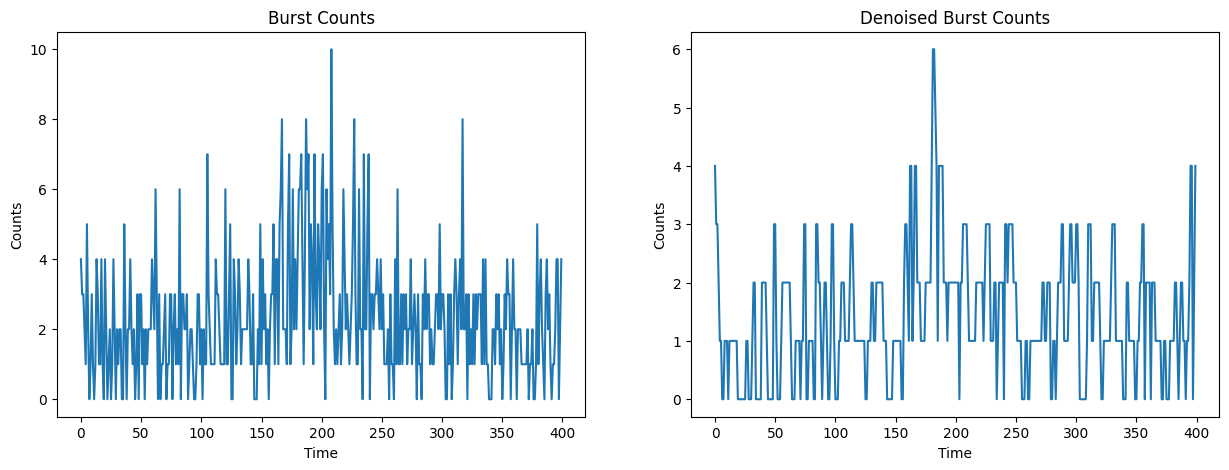

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df['counts'])
# ax[0].axhline(y=average_value, color='r', linestyle='--', label='Average Value')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Counts')
# ax[0].legend()
ax[0].set_title('Burst Counts')

ax[1].plot(df['counts_denoised'])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Counts')
# ax[1].legend()
ax[1].set_title('Denoised Burst Counts')
plt.show()


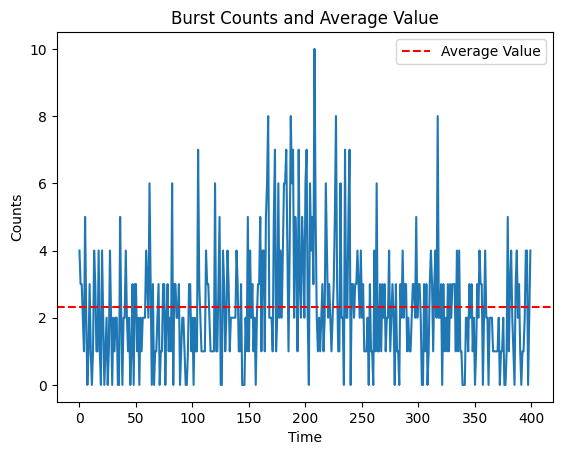

In [6]:
average_value = df['counts'].mean()
plt.plot(df['counts'])
plt.axhline(y=average_value, color='r', linestyle='--', label='Average Value')
# plt.plot(df['t'], average_value * np.ones(len(df['t'])), label='Average Value', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Average Value')
plt.show()


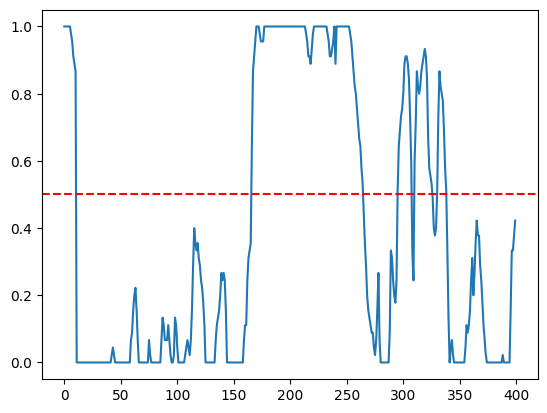

(166, 264)

In [7]:
# probability of being above average
counts_above_average = np.zeros(len(df['counts_denoised']))

K_upper = 50
K_lower = 5
average_value = df['counts_denoised'].mean()
for k in range(K_lower, K_upper):
    window_size = k  # You can change the window size as desired
    running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

    counts_above_average[running_avg > average_value] += 1


counts_above_average = counts_above_average / (K_upper - K_lower)

plt.plot(counts_above_average)
plt.axhline(y=0.5, color='r', linestyle='--', label='Average Value')
plt.show()

# get largest window size
points_above_average = np.where(counts_above_average > 0.5)[0]
# print(points_above_average)

# group sequential points together
groups = []
group_start = points_above_average[0].item()
group_length = 0
for i in range(1, len(points_above_average)):
    if points_above_average[i] == points_above_average[i-1] + 1:
        group_length += 1
    
    else:
        groups.append((group_start, group_start+group_length))
        group_start = points_above_average[i].item()
        group_length = 0

# sort the groups w.r.t. group[1] - group[0]
groups.sort(key=lambda x: x[1] - x[0], reverse=True)

# get the largest group
largest_group = groups[0]
largest_group


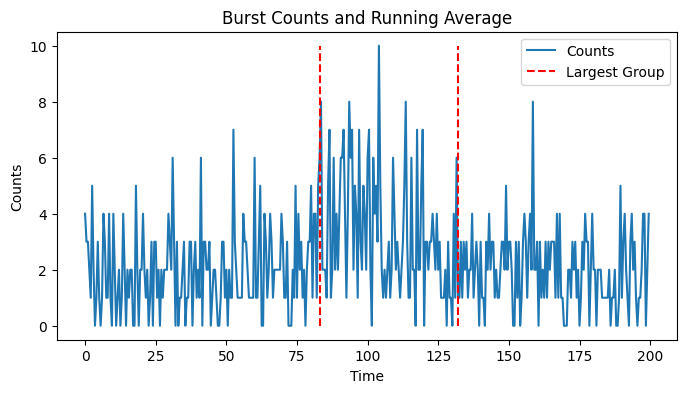

In [8]:
window_size = 15  # You can change the window size as desired
running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

# Gaussian smoothing
# alpha = 0.1
# smoothed_counts = np.convolve(running_avg, np.ones(window_size)/window_size, mode='valid')

average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['counts'], label='Counts')
# plt.plot(df['t'], running_avg, label=f'Running Avg (window={window_size})', linewidth=2)
# plt.plot(df['t'], smoothed_counts, label=f'Gaussian Smoothing (alpha={alpha})', linewidth=2)
plt.xlabel('Time')
# plt.axhline(y=average_value, color='r', linestyle='--', label='Average Value')
plt.vlines(x=largest_group[1]//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=largest_group[0]//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


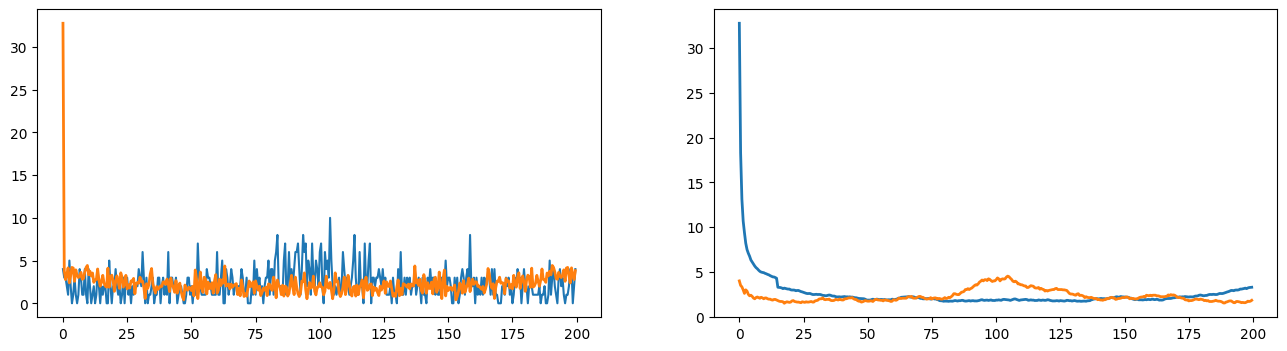

In [9]:
# trying phase-shift for denoising

import numpy as np

# Get counts
counts = df['counts'].values

# Compute FFT
counts_fft = np.fft.fft(counts)

# Zero out phases (keep only magnitudes)
magnitude = np.abs(counts_fft)
phase = np.angle(counts_fft)
zero_phase_fft = magnitude * np.exp(1j * 0)

smoothed_counts = np.fft.ifft(zero_phase_fft).real

df['zero_phase_smoothed'] = smoothed_counts

running_avg = df['zero_phase_smoothed'].rolling(window=30, min_periods=1).mean()
running_avg_original = df['counts'].rolling(window=30, min_periods=1).mean()

fig, ax = plt.subplots(1, 2, figsize=(16,4))
ax[0].plot(df['t'], counts, label='Original')
ax[0].plot(df['t'], smoothed_counts, label='Zero-phase Smoothed', linewidth=2)
ax[1].plot(df['t'], running_avg, label='Running Average Zero-phase Smoothed', linewidth=2)
ax[1].plot(df['t'], running_avg_original, label='Running Average Original', linewidth=2)
plt.show()


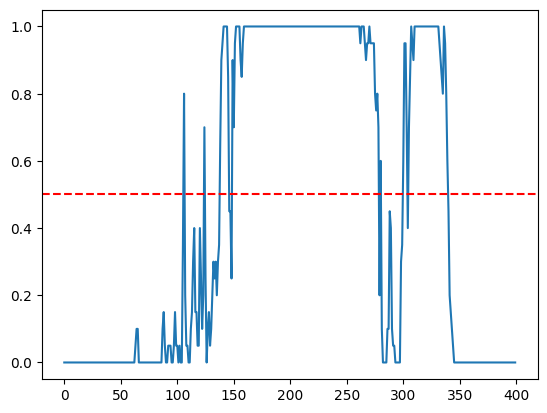

(149, 278)

In [10]:
# probability of being above average
# df['zero_phase_smoothed'] = smoothed_counts

counts_above_average = np.zeros(len(df['counts_denoised']))

epsilon = 0.1
K_upper = 35
K_lower = 15
# average_value = df['counts'].mean()
for k in range(K_lower, K_upper):
    window_size = k  # You can change the window size as desired
    running_avg_original = df['counts'].rolling(window=window_size, min_periods=1).mean()
    running_avg = df['zero_phase_smoothed'].rolling(window=window_size, min_periods=1).mean()

    counts_above_average[running_avg < running_avg_original] += 1


counts_above_average = counts_above_average / (K_upper - K_lower)

plt.plot(counts_above_average)
plt.axhline(y=0.5, color='r', linestyle='--', label='Average Value')
plt.show()

# get largest window size
points_above_average = np.where(counts_above_average > 0.5)[0]
# print(points_above_average)

# group sequential points together
groups = []
group_start = points_above_average[0].item()
group_length = 0
for i in range(1, len(points_above_average)):
    if points_above_average[i] == points_above_average[i-1] + 1:
        group_length += 1
    
    else:
        groups.append((group_start, group_start+group_length))
        group_start = points_above_average[i].item()
        group_length = 0

# sort the groups w.r.t. group[1] - group[0]
groups.sort(key=lambda x: x[1] - x[0], reverse=True)

# get the largest group
largest_group = groups[0]
largest_group


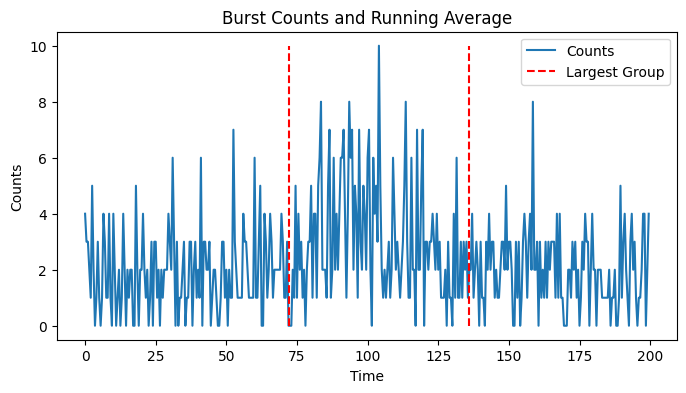

In [11]:
window_size = 15  # You can change the window size as desired
running_avg = df['counts_denoised'].rolling(window=window_size, min_periods=1).mean()

# Gaussian smoothing
# alpha = 0.1
# smoothed_counts = np.convolve(running_avg, np.ones(window_size)/window_size, mode='valid')

average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['counts'], label='Counts')
plt.xlabel('Time')
plt.vlines(x=(largest_group[1]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=(largest_group[0]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


In [12]:
from bayesDenoise import denoise_wavelet_1d

In [13]:
df['bayes_denoised'] = denoise_wavelet_1d(df['counts'].values, method='BayesShrink', wavelet='db1', mode='hard')

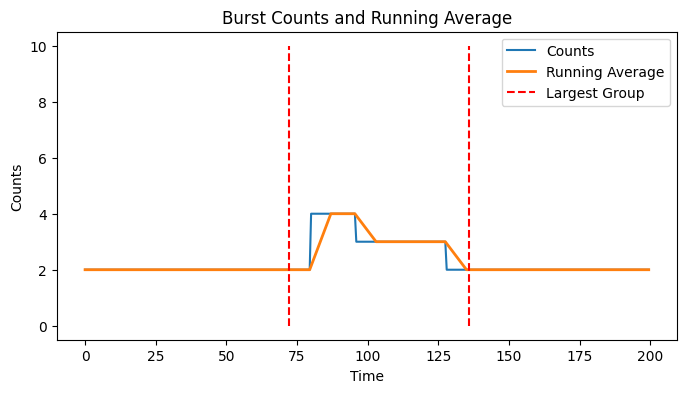

In [14]:
window_size = 15  # You can change the window size as desired
running_avg = df['bayes_denoised'].rolling(window=window_size, min_periods=1).mean()
average_value = df['counts'].mean()
average_value = df['counts_denoised'].mean()


plt.figure(figsize=(8,4))
plt.plot(df['t'], df['bayes_denoised'], label='Counts')
plt.xlabel('Time')
plt.plot(df['t'], running_avg, label='Running Average', linewidth=2)
plt.vlines(x=(largest_group[1]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--')
plt.vlines(x=(largest_group[0]-5)//2, ymin=0, ymax=max(df['counts']), color='r', linestyle='--', label='Largest Group')
plt.ylabel('Counts')
plt.legend()
plt.title('Burst Counts and Running Average')
plt.show()


### (b) MLE Estimation 
Using newtons method

In [15]:
L = -1
R = -1
T = -1

def log_likelihood(_lambda):
    # lambda_1, lambda_2 = _lambda
    output = 0
    for i in range(L):
        output += -_lambda[0] + df['counts'][i] * np.log(_lambda[0]) - np.log(math.factorial(df['counts'][i]))
        
    if R < T:
        for i in range(R, T):
            output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
            

    for i in range(L, R):
        output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
        

    return output

def gradient(_lambda):
    grad_lambda_1 = 0
    for i in range(L):
        grad_lambda_1 += -1 + df['counts'][i] / _lambda[0]
    if R < T:
        for i in range(R, T):
            grad_lambda_1 += -1 + df['counts'][i] / _lambda[0]
    
    grad_lambda_2 = 0
    for i in range(L, R):
        grad_lambda_2 += -1 + df['counts'][i] / _lambda[1]
        
    return np.array([grad_lambda_1, grad_lambda_2], dtype=float).flatten()

def hessian(_lambda):
    grad_lambda_1_squared = 0.0


    for i in range(L):
        grad_lambda_1_squared += - df['counts'][i] / (_lambda[0]**2)

    if R < T:
        for i in range(R, T):
            grad_lambda_1_squared += - df['counts'][i] / (_lambda[0]**2)

    grad_lambda_2_squared = 0.0
    for i in range(L, R):
        grad_lambda_2_squared += - df['counts'][i] / (_lambda[1]**2)

    return np.array([[grad_lambda_1_squared, 0.0], [0.0, grad_lambda_2_squared]], dtype=float)

In [16]:
from scipy import optimize
import numpy as np

In [17]:
L = largest_group[0]-5
R = largest_group[1]-5
T = len(df['counts'])

L, R, T

(144, 273, 400)

In [18]:
class LogLikelihood(torch.nn.Module):
    def __init__(self, L, R, T):
        super(LogLikelihood, self).__init__()
        self.L = L
        self.R = R
        self.T = T

    def forward(self, Lambda1, Lambda2):
        output = 0.0
        for i in range(self.L):
            output += -Lambda1 + df['counts'][i] * torch.log(Lambda1) - np.log(math.factorial(df['counts'][i]))
        
        if self.R < self.T:
            for i in range(self.R, self.T):
                output += -Lambda1 + df['counts'][i] * torch.log(Lambda1) - np.log(math.factorial(df['counts'][i]))
            
        for i in range(self.L, self.R):
            output += -Lambda2 + df['counts'][i] * torch.log(Lambda2) - np.log(math.factorial(df['counts'][i]))
            
        return output 

In [19]:
def gradient_log_likelihood(lamb_1, lamb_2, L, R, T) -> torch.tensor:
    grad_lambs = torch.tensor([0.0, 0.0], requires_grad=False)
    
    for i in range(L):
        # print(((df['counts'][i].item())/lamb_1).shape, lamb_1.shape)
        grad_lambs[0] += -1 + ((df['counts'][i].item())/lamb_1)

    for i in range(R, T):
        grad_lambs[0] += -1 + ((df['counts'][i].item())/lamb_1)

    for i in range(L, R):
        grad_lambs[1] += -1 + ((df['counts'][i].item())/lamb_2)

    return grad_lambs

#### Gradient Descent

Gradient Descent: 100%|██████████| 200/200 [00:02<00:00, 83.24it/s]


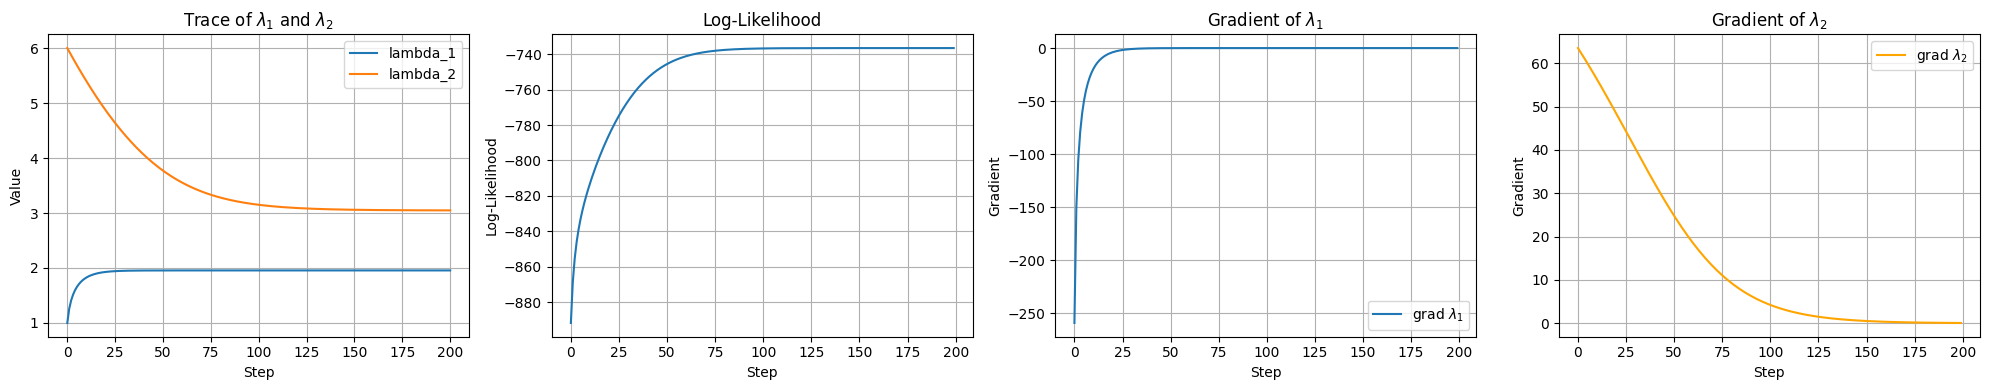

Converged to:
	Lambda 1: 1.955719232559204
	Lambda 2: 3.0479207038879395
	Log-Likelihood: -736.5333251953125


In [20]:
# gradient descent

lambda_1 = 1.0
lambda_2 = 6.0

lambda_1 = torch.tensor(lambda_1, requires_grad=True)
lambda_2 = torch.tensor(lambda_2, requires_grad=True)

optim = torch.optim.SGD([lambda_1, lambda_2], lr=1e-3)
optim.zero_grad()

f = LogLikelihood(L, R, T)

steps = 200

lambda_1_history = [lambda_1.item()]
lambda_2_history = [lambda_2.item()]
likelihood_history = []
gradient_history_lambda_1 = []
gradient_history_lambda_2 = []
for step in tqdm(range(steps), total=steps, desc='Gradient Descent'):
    optim.zero_grad()
    # print('Step:', step, 'Lambda1:', lambda_1.item(), 'Lambda2:', lambda_2.item())
    # output = gradient_log_likelihood(lambda_1, lambda_2, L, R, T)
    output = -f(lambda_1, lambda_2)
    output = output.sum()
    output.backward()
    optim.step()

    lambda_1_history.append(lambda_1.detach().item())
    lambda_2_history.append(lambda_2.detach().item())
    gradient_history_lambda_1.append(lambda_1.grad.item())
    gradient_history_lambda_2.append(lambda_2.grad.item())
    
    with torch.no_grad():
        likelihood = f(lambda_1, lambda_2)
        likelihood_history.append(likelihood.item())

fig, ax = plt.subplots(1, 4, figsize=(20,4))

# Plot lambda_1 and lambda_2 trace
ax[0].plot(lambda_1_history, label='lambda_1')
ax[0].plot(lambda_2_history, label='lambda_2')
ax[0].set_title('Trace of $\\lambda_1$ and $\\lambda_2$')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[0].grid(True)

# Plot likelihood history
ax[1].plot(likelihood_history)
ax[1].set_title('Log-Likelihood')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Log-Likelihood')
ax[1].grid(True)

# Plot gradient history of lambda_1
ax[2].plot(gradient_history_lambda_1, label='grad $\\lambda_1$')
ax[2].set_title('Gradient of $\\lambda_1$')
ax[2].set_xlabel('Step')
ax[2].set_ylabel('Gradient')
ax[2].legend()
ax[2].grid(True)

# Plot gradient history of lambda_2
ax[3].plot(gradient_history_lambda_2, label='grad $\\lambda_2$', color='orange')
ax[3].set_title('Gradient of $\\lambda_2$')
ax[3].set_xlabel('Step')
ax[3].set_ylabel('Gradient')
ax[3].legend()
ax[3].grid(True)


plt.tight_layout()
plt.show()

print('Converged to:')
print('\tLambda 1:', lambda_1.item())
print('\tLambda 2:', lambda_2.item())
print('\tLog-Likelihood:', likelihood_history[-1])

#### Newtons Method

/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_37087/4115526386.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[0] + df['counts'][i] * np.log(_lambda[0]) - np.log(math.factorial(df['counts'][i]))
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_37087/4115526386.py:13: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))
/var/folders/65/zrtbfn791rn640f82t5dqybm0000gn/T/ipykernel_37087/4115526386.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output += -_lambda[1] + df['counts'][i] * np.log(_lambda[1]) - np.log(math.factorial(df['counts'][i]))


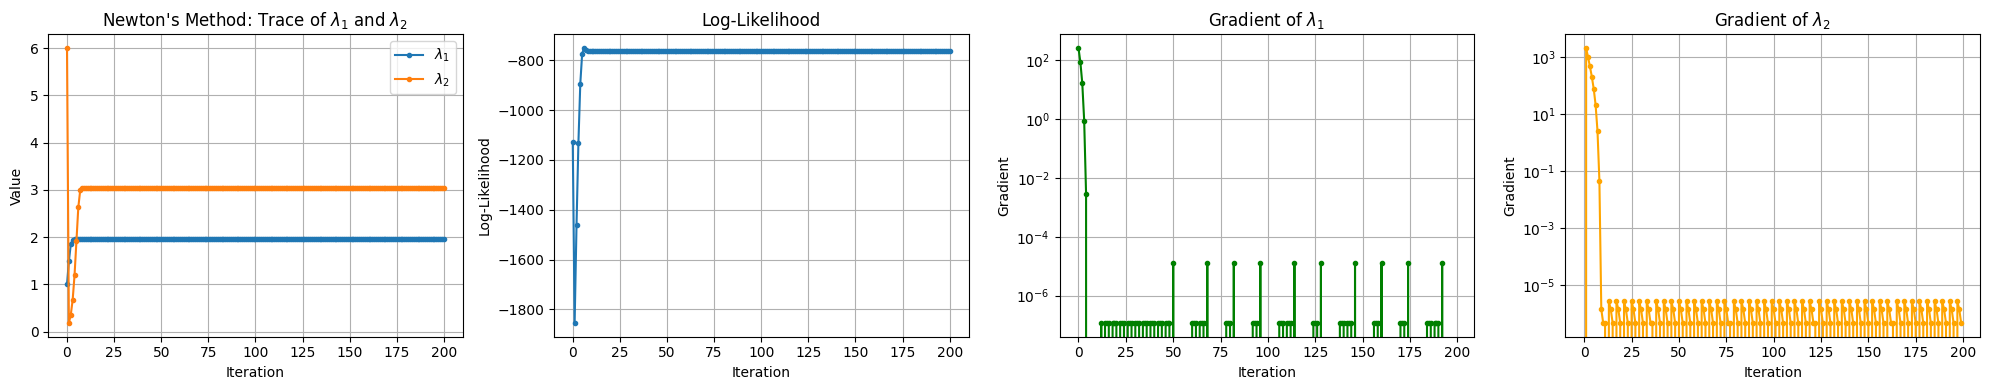

Newton's Method Results:
	λ₁ (background rate): 1.955720
	λ₂ (burst rate): 3.046511
	Log-Likelihood: -762.924707
	Iterations: 200


In [21]:
# Newton's Method for computing lambda1 and lambda2
def compute_hessian(lamb_1, lamb_2, L, R, T):
    h_11 = 0.0

    for i in range(L):
        h_11 += -df['counts'][i].item() * 1.0 / (lamb_1 ** 2)
    for i in range(R, T):
        h_11 += -df['counts'][i].item() * 1.0 / (lamb_1 ** 2)
    
    h_22 = 0.0
    for i in range(L, R):
        h_22 += -df['counts'][i].item() * 1.0 / (lamb_2 ** 2)
    
    return torch.tensor([[h_11, 0.0], [0.0, h_22]], dtype=float)

lambda_1_init = 1.0
lambda_2_init = 6.0

lambdas = torch.tensor([lambda_1_init, lambda_2_init], dtype=float, requires_grad=False)

max_iterations = 200
# tolerance = 1e-8

lambda_1_history = [lambdas[0]]
lambda_2_history = [lambdas[1]]
likelihood_history = [log_likelihood(lambdas)]
# gradient_norm_history = []
gradient_lambda_1_history = []
gradient_lambda_2_history = []

for iteration in range(max_iterations):
    grad = gradient_log_likelihood(lambdas[0], lambdas[1], L, R, T).float()
    H = compute_hessian(lambdas[0], lambdas[1], L, R, T).float()
    
    # gradient_norm_history.append(torch.linalg.norm(grad))
    gradient_lambda_1_history.append(grad[0])
    gradient_lambda_2_history.append(grad[1])
    
    H_inv = torch.tensor([[1.0/H[0,0], 0.0], [0.0, 1.0/H[1,1]]], dtype=float).float()
    delta = H_inv @ grad.float()

    lambdas = lambdas - delta
        
    lambda_1_history.append(lambdas[0])
    lambda_2_history.append(lambdas[1])
    likelihood_history.append(log_likelihood(lambdas))

# Plotting
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot lambda_1 and lambda_2 trace
ax[0].plot(lambda_1_history, label='$\\lambda_1$', marker='o', markersize=3)
ax[0].plot(lambda_2_history, label='$\\lambda_2$', marker='o', markersize=3)
ax[0].set_title("Newton's Method: Trace of $\\lambda_1$ and $\\lambda_2$")
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[0].grid(True)

# Plot likelihood history
ax[1].plot(likelihood_history, marker='o', markersize=3)
ax[1].set_title('Log-Likelihood')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Log-Likelihood')
ax[1].grid(True)

# Plot gradient norm history
ax[2].plot(gradient_lambda_1_history, marker='o', markersize=3, color='green')
# ax[2].plot(gradient_lambda_2_history, marker='o', markersize=3, color='orange')
ax[2].set_title('Gradient of $\\lambda_1$')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('Gradient')
ax[2].set_yscale('log')
ax[2].grid(True)

# Plot gradient of lambda_2
ax[3].plot(gradient_lambda_2_history, marker='o', markersize=3, color='orange')
ax[3].set_title('Gradient of $\\lambda_2$')
ax[3].set_xlabel('Iteration')
ax[3].set_ylabel('Gradient')
ax[3].set_yscale('log')
ax[3].grid(True)

plt.tight_layout()
plt.show()

print("Newton's Method Results:")
print(f'\tλ₁ (background rate): {lambdas[0]:.6f}')
print(f'\tλ₂ (burst rate): {lambdas[1]:.6f}')
print(f'\tLog-Likelihood: {likelihood_history[-1]:.6f}')
print(f'\tIterations: {len(lambda_1_history) - 1}')


#### Closed form solution

In [22]:
lambda_1 = 0.0
for i in range(L):
    lambda_1 += df['counts'][i].item()
for i in range(R, T):
    lambda_1 += df['counts'][i].item()
lambda_1 /= (L + (T-R))

lambda_2 = 0.0
for i in range(L, R):
    lambda_2 += df['counts'][i].item()
lambda_2 /= (R-L)
print(lambda_1, lambda_2)

1.955719557195572 3.046511627906977


In [23]:
sum_counts_lambda_1 = 0.0
for i in range(L):
    sum_counts_lambda_1 += df['counts'][i].item()
for i in range(R, T):
    sum_counts_lambda_1 += df['counts'][i].item()

variance_lambda_1 = (lambda_1**2) / sum_counts_lambda_1

sum_counts_lambda_2 = 0.0
for i in range(L, R):
    sum_counts_lambda_2 += df['counts'][i].item()

variance_lambda_2 = (lambda_2**2) / sum_counts_lambda_2

variance_lambda_1, variance_lambda_2

(0.007216677332824988, 0.023616369208581216)

### (c) MLE for $\lambda$

In [24]:
sum_counts = df['counts'].sum()
t_end = len(df['counts'])

lambda_MLE = sum_counts / t_end
lambda_MLE.item()

2.3075

In [25]:
variance_lambda_MLE = (lambda_MLE**2) / sum_counts
variance_lambda_MLE.item()

0.0057687500000000004

### (d) Log-Likelihood Ratio Test

In [27]:
_lambda_1, _lambda_2 = lambda_1, lambda_2
_lambda_1, _lambda_2

(1.955719557195572, 3.046511627906977)

In [28]:
def compute_log_likelihoods(counts: [int], lambda_bg, lambda_burst, lambda_MLE, L, R, T) -> Tuple[float, float]:
    log_likelihood_null = 0.0
    for i in range(T):
        log_likelihood_null += (-lambda_MLE + np.log(lambda_MLE) * counts[i]) - np.log(math.factorial(counts[i]))
    # print('Log-Likelihood null hypothesis:', log_likelihood_null.item())

    log_likelihood_alt = 0.0
    for i in range(L):
        log_likelihood_alt += (-lambda_bg + np.log(lambda_bg) * counts[i]) - np.log(math.factorial(counts[i]))
    for i in range(L, R):
        log_likelihood_alt += (-lambda_burst + np.log(lambda_burst) * counts[i]) - np.log(math.factorial(counts[i]))
    for i in range(R, t_end):
        log_likelihood_alt += (-lambda_bg + np.log(lambda_bg) * counts[i]) - np.log(math.factorial(counts[i]))

    return log_likelihood_null, log_likelihood_alt
    # print('Log-Likelihood alternative hypothesis:', log_likelihood_alt.item())

In [38]:
def compute_T_statistic(counts: [int], lambda_bg, lambda_burst, lambda_MLE, L, R, T) -> float:
    log_likelihood_null, log_likelihood_alt = compute_log_likelihoods(counts, lambda_bg, lambda_burst, lambda_MLE, L, R, T)
    
    T_statistic = -2 * (log_likelihood_null - log_likelihood_alt)
    return T_statistic
print('T-statistic:', compute_T_statistic(df['counts'].values, _lambda_1, _lambda_2, lambda_MLE, L, R, T))

T-statistic: 43.045468976485154


Because there are $n=2$ ($\lambda_{bg}, \lambda_{burst}$) number of independent parameters in the likelihood computation, we use a chi-squared test with $n-1 = 1$ degree of freedom.

In [39]:
p_value = 1.0 - stats.chi2.cdf(compute_T_statistic(df['counts'].values, _lambda_1, _lambda_2, lambda_MLE, L, R, t_end), df=1)
print('p-value:', p_value)

p-value: 5.3482329676057816e-11


**Conclusion**: Because the p-value of the $\chi^2$ test is very small ($5.3e^{-11}$), there is an extremenly small probability of observing data at least as extreme as the one given, given that the null hypothesis ($\lambda_{bg} = \lambda_{burst} = \lambda$) is true.

Therefore, because the p-value is smaller than a threshold of $0.05$ (or even $0.005$), we reject our null hypothesis and accept the alternative hypothesis, namely that $\lambda_{bg} \neq \lambda_{burst}$, i.e., that a burst really happened.

##### (Optional) including variance

In [40]:
sigma_lambda_1 = np.sqrt(variance_lambda_1)
sigma_lambda_2 = np.sqrt(variance_lambda_2)

for delta_lambda_1 in [-2*sigma_lambda_1, 0.0, 2*sigma_lambda_1]:
    for delta_lambda_2 in [-2*sigma_lambda_2, 0.0, 2*sigma_lambda_2]:

        p_value = 1.0 - stats.chi2.cdf(compute_T_statistic(df['counts'].values, _lambda_1+delta_lambda_1, _lambda_2+delta_lambda_2, lambda_MLE, L, R, t_end), df=1)
        print('p-value:', p_value)

p-value: 4.248527862849016e-09
p-value: 4.701107281235295e-10
p-value: 3.2171536545888557e-09
p-value: 4.806532949430675e-10
p-value: 5.3482329676057816e-11
p-value: 3.642500745471011e-10
p-value: 3.3450879843854864e-09
p-value: 3.703906070740004e-10
p-value: 2.5332688169399376e-09


In [54]:
def compute_T_statistic_with_variance(counts: [int], lambda_bg, lambda_burst, lambda_MLE, L, R, T, v_lambda_bg, v_lambda_burst, v_lambda_MLE, sigma:float = 2) -> List[float]:
    # min_T, max_T = None, None

    T_statistics = []


    for delta_lambda_1 in [-sigma*v_lambda_bg, 0.0, sigma*v_lambda_bg]:
        for delta_lambda_2 in [-sigma*v_lambda_burst, 0.0, sigma*v_lambda_burst]:
            for delta_lambda_MLE in [-sigma*v_lambda_MLE, 0.0, sigma*v_lambda_MLE]:

                log_likelihood_null, log_likelihood_alt = compute_log_likelihoods(counts, lambda_bg+delta_lambda_1, lambda_burst+delta_lambda_2, lambda_MLE+delta_lambda_MLE, L, R, T)
                T_statistic = -2 * (log_likelihood_null - log_likelihood_alt)

            # if min_T is None:
            #     min_T = T_statistic

            # if max_T is None:
            #     max_T = T_statistic

            # if T_statistic < min_T:
            #     min_T = T_statistic
            # if T_statistic > max_T:
            #     max_T = T_statistic
                
            T_statistics.append(T_statistic)
    return T_statistics

**Conclusion**:
Even when using estimations for $\lambda_{bg}$ and $\lambda_{burst}$ that are 2 standard deviations away from the computed mean, we observe p-values in the range of $[10^{-9}, 10^{-10}]$. 

### (e) Synthetic Data

To make the results comparable, we use the same $t_{end}$ for all 1000 synthetic datasets.

In [55]:
t_end = len(df['counts'])

In [62]:
def generate_synthetic_dataset(lambda_1: float, lambda_2: float, L: int, R: int, T: int, seed: int = 42) -> np.ndarray:
    assert L < R
    assert R < T

    # random generator
    rng = np.random.default_rng(seed=seed)

    data = []

    data.extend(rng.poisson(lam=lambda_1, size=L).tolist())
    data.extend(rng.poisson(lam=lambda_2, size=R-L).tolist())
    data.extend(rng.poisson(lam=lambda_1, size=T-R).tolist())

    return np.array(data)

Generating synthetic datasets using the following configuration:
	lambda_bg = 1.955719557195572
	lambda_burst = 3.046511627906977
	lambda = 2.3075
	L = 144
	R = 273
	t_end = 400
T-statistic threshold: 3.8414588206941205
Percentage of datasets with H_0 rejected: 0.1% (1 out of 1000)


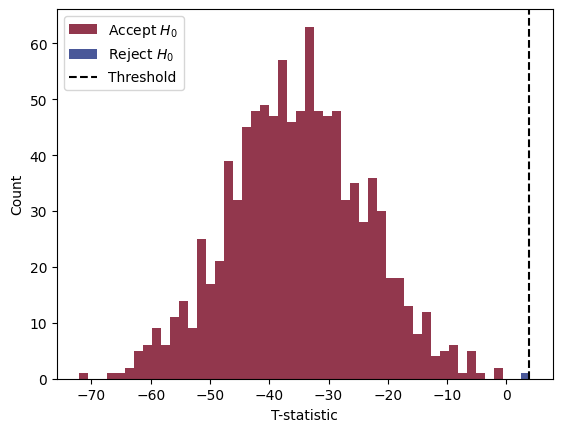

In [76]:
num_synthetic_datasets = 1000

print('Generating synthetic datasets using the following configuration:')
print(f'\tlambda_bg = {_lambda_1}')
print(f'\tlambda_burst = {_lambda_2}')
print(f'\tlambda = {lambda_MLE.item()}')
print(f'\tL = {L}')
print(f'\tR = {R}')
print(f'\tt_end = {t_end}')

T_statistics = []
for i in range(num_synthetic_datasets):
    # data = generate_synthetic_dataset(_lambda_1, _lambda_2, L, R, t_end)
    data = generate_synthetic_dataset(_lambda_1, _lambda_1, L, R, t_end, seed=i*5)
    t_statistic = compute_T_statistic(data, _lambda_1, _lambda_2, lambda_MLE, L, R, t_end)
    T_statistics.append(t_statistic)
T_statistics = np.array(T_statistics)


# using alpha = 5%, we would accept the null hypothesis if the p-value is greater than 0.05
# therefore, we compute what T-statistic would be required to accept the null hypothesis
T_statistic_threshold = stats.chi2.ppf(1 - 0.05, df=1)
print('T-statistic threshold:', T_statistic_threshold)

# T_statistics = np.array([1.0 - stats.chi2.cdf(t, df=1) for t in T_statistics])

# Plotting
T_accept = T_statistics[T_statistics <= T_statistic_threshold]
T_above = T_statistics[T_statistics > T_statistic_threshold]

print(f'Percentage of datasets with H_0 rejected: {100.0 * (len(T_above) / len(T_statistics))}% ({len(T_above)} out of {len(T_statistics)})')
# print(f'Percentage of Type 2 error in synthetic data: {100.0 * (len(T_above) / len(T_statistics))}% ({len(T_accept)} out of {len(T_statistics)})')


bins = np.histogram_bin_edges(T_statistics, bins=50)
plt.hist(
    [T_accept, T_above],
    bins=bins,
    color=['#92374D', '#4A5899'],
    label=['Accept $H_0$', 'Reject $H_0$'],
    stacked=True,
)
plt.axvline(T_statistic_threshold, color='k', linestyle='--', label='Threshold')
plt.xlabel('T-statistic')
plt.ylabel('Count')
plt.legend()
plt.show()

**Conclusion**
By creating synthetic data generated from the distribution of $H_0$, we observe that we accept the null hypothesis in the majority of the cases. In fact, by pure chance, with $\alpha = 0.05$ (i.e., an acceptence rate of 5 percentage), we only reject the null hypothesis at most 2 or 3 times out of the 1000 datasets. 

Furthermore, we also observe the datasets where we reject the null hypothesis have a much lower T-statistic compared to the one we observed on the given data. Synthetic data (with type 1 error), have a T-statistic of at most 10, whereas our observations has a T-statistic of 46.

Altogether, we can therefore be confident that, on the observed data, rejecting the null hypothesis although it is true (type 1 error) is very unlikely, especially given the high T-statistic that we computed.

Nevertheless, we cannot conclude with 100% confidence that rejecting the null hypothesis is the correct decision, as even on synthetic data --- where we know the ground truth distribution --- it can still happen that, by chance, the datataset has a higher likelihood under the null hypothesis compared to the alternative hypothesis.  

##### (Optional)

Generating synthetic datasets using the following configuration:
	lambda_bg = 1.955719557195572
	lambda_burst = 3.046511627906977
	lambda = 2.3075
	L = 144
	R = 273
	t_end = 400
T-statistic threshold: 3.8414588206941205
Percentage of datasets with H_0 rejected: 0.08% (7 out of 9000)


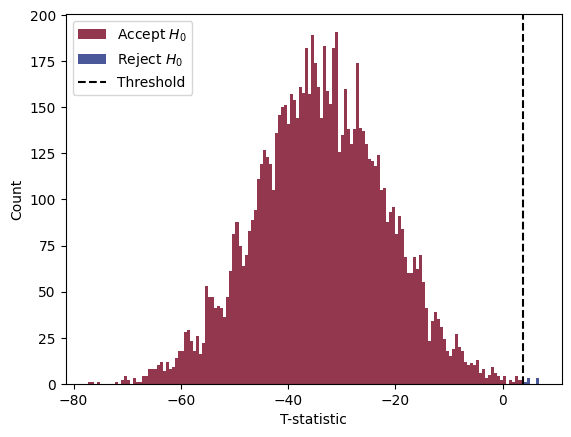

In [78]:
num_synthetic_datasets = 1000

print('Generating synthetic datasets using the following configuration:')
print(f'\tlambda_bg = {_lambda_1}')
print(f'\tlambda_burst = {_lambda_2}')
print(f'\tlambda = {lambda_MLE.item()}')
print(f'\tL = {L}')
print(f'\tR = {R}')
print(f'\tt_end = {t_end}')

T_statistics = []
for i in range(num_synthetic_datasets):
    # data = generate_synthetic_dataset(_lambda_1, _lambda_2, L, R, t_end)
    data = generate_synthetic_dataset(_lambda_1, _lambda_1, L, R, t_end, seed=i*5)
    t_statistic = compute_T_statistic_with_variance(data, _lambda_1, _lambda_2, lambda_MLE, L, R, t_end, variance_lambda_1, variance_lambda_2, variance_lambda_MLE)
    T_statistics.append(t_statistic)
T_statistics = np.array(T_statistics).reshape(-1)


# using alpha = 5%, we would accept the null hypothesis if the p-value is greater than 0.05
# therefore, we compute what T-statistic would be required to accept the null hypothesis
T_statistic_threshold = stats.chi2.ppf(1 - 0.05, df=1)
print('T-statistic threshold:', T_statistic_threshold)

# T_statistics = np.array([1.0 - stats.chi2.cdf(t, df=1) for t in T_statistics])

# Plotting
T_accept = T_statistics[T_statistics <= T_statistic_threshold]
T_above = T_statistics[T_statistics > T_statistic_threshold]

print(f'Percentage of datasets with H_0 rejected: {100.0 * (len(T_above) / len(T_statistics)):.2f}% ({len(T_above)} out of {len(T_statistics)})')
# print(f'Percentage of Type 2 error in synthetic data: {100.0 * (len(T_above) / len(T_statistics))}% ({len(T_accept)} out of {len(T_statistics)})')


bins = np.histogram_bin_edges(T_statistics, bins=50*3)
plt.hist(
    [T_accept, T_above],
    bins=bins,
    color=['#92374D', '#4A5899'],
    label=['Accept $H_0$', 'Reject $H_0$'],
    stacked=True,
)
plt.axvline(T_statistic_threshold, color='k', linestyle='--', label='Threshold')
plt.xlabel('T-statistic')
plt.ylabel('Count')
plt.legend()
plt.show()

*(Optional)*
Even when using values for $\lambda_{bg}$, $\lambda_{burst}$, and $\lambda$ that are 2 standard deviations away from the estimated 

# Problem 5

### (a)

In [2]:
class IsingModel:
    def __init__(self, n: int, m: int, random_init: bool = True):
        self.n = n
        self.m = m
        self.random_init = random_init

        self.reset()

    def reset(self):
        if self.random_init:
            self.grid = np.random.choice([-1, 1], size=(self.n, self.m), replace=True) 
        else:
            self.grid = np.ones((self.n, self.m), dtype=int)


    def energy(self) -> float:
        energy = 0.0

        for i in range(self.n):
            for j in range(self.m):

                # if there is a neighbor to the left
                if i > 0:
                    energy += self.grid[i, j] * self.grid[i-1, j]

                # if there is a neighbor to the right
                if i < self.n - 1:
                    energy += self.grid[i, j] * self.grid[i+1, j]

                # if there is a neighbor to the top
                if j > 0:
                    energy += self.grid[i, j] * self.grid[i, j-1]

                # if there is a neighbor to the bottom
                if j < self.m - 1:
                    energy += self.grid[i, j] * self.grid[i, j+1]

        return -energy

    def probability(self, T: float) -> float:
        return np.exp(-self.energy() / T)

    def log_probability(self, T: float) -> float:
        return -self.energy() / T
    

    def sample_configuration(self, T: float, num_steps: int, progress: bool = True, stop_when_converged: bool = True) -> None:
        """
        We used the Metropolis-Hastings algorithm to sample from the distribution of the Ising model.

        Note that because of the computation of low values for the probabilities, we moved everything to the log domain.
        """
        accept = 0
        reject = 0

        history = []
        history_length = max(num_steps // 25, 1_000)

        for _ in (pbar := tqdm(range(num_steps), total=num_steps, desc=f'Sampling configuration with temperature T = {T}', disable=not progress)):
            
            # choose a random cell
            i, j = np.random.randint(0, self.n), np.random.randint(0, self.m)

            # get the current energy
            current_probability = self.log_probability(T)

            # flip the spin
            self.grid[i, j] *= -1

            # compute the new energy
            new_probability = self.log_probability(T)

            # acceptance probability
            alpha = new_probability - current_probability
            alpha = min(np.log(1.0), alpha)

            # accept or reject
            # print(np.log(np.random.rand()), alpha)
            if np.log(np.random.rand()) <= alpha:
                # do nothing, we already switched the spin
                accept += 1
                history.append(1)
            else:
                history.append(0)
                # switch the spin back
                self.grid[i, j] *= -1
                reject += 1

            if len(history) > history_length:
                history.pop(0)
                pbar.set_postfix(acceptance_rate=(accept/(accept + reject) * 100.0), short_term_acceptance_rate=(sum(history) / len(history))*100.0)

                if stop_when_converged and sum(history) / len(history) < 0.01:
                    break
            else:
                pbar.set_postfix(acceptance_rate=(accept/(accept + reject) * 100.0))


        if progress:
            print(f'Acceptance rate: {100.0 * accept / (accept + reject):.1f}% ({accept} out of {accept + reject})')

            
    def plot_grid(self, ax = None) -> None:
        if ax is None:
            fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(self.grid, cmap='gray')

Sampling configuration with temperature T = 1.0: 100%|██████████| 2560/2560 [00:01<00:00, 1554.13it/s, acceptance_rate=16.3, short_term_acceptance_rate=8.6] 


Acceptance rate: 16.3% (418 out of 2560)


Sampling configuration with temperature T = 1.5: 100%|██████████| 2560/2560 [00:01<00:00, 1520.00it/s, acceptance_rate=16.2, short_term_acceptance_rate=8]   


Acceptance rate: 16.2% (415 out of 2560)


Sampling configuration with temperature T = 2.0: 100%|██████████| 2560/2560 [00:01<00:00, 1566.14it/s, acceptance_rate=17.6, short_term_acceptance_rate=8.9] 


Acceptance rate: 17.6% (450 out of 2560)


Sampling configuration with temperature T = 3.0: 100%|██████████| 2560/2560 [00:01<00:00, 1507.98it/s, acceptance_rate=24.3, short_term_acceptance_rate=16.6]


Acceptance rate: 24.3% (622 out of 2560)


Sampling configuration with temperature T = 5.0: 100%|██████████| 2560/2560 [00:01<00:00, 1467.74it/s, acceptance_rate=42.4, short_term_acceptance_rate=36.9]


Acceptance rate: 42.4% (1086 out of 2560)


Sampling configuration with temperature T = 10.0: 100%|██████████| 2560/2560 [00:01<00:00, 1559.37it/s, acceptance_rate=72.5, short_term_acceptance_rate=74.3]


Acceptance rate: 72.5% (1856 out of 2560)


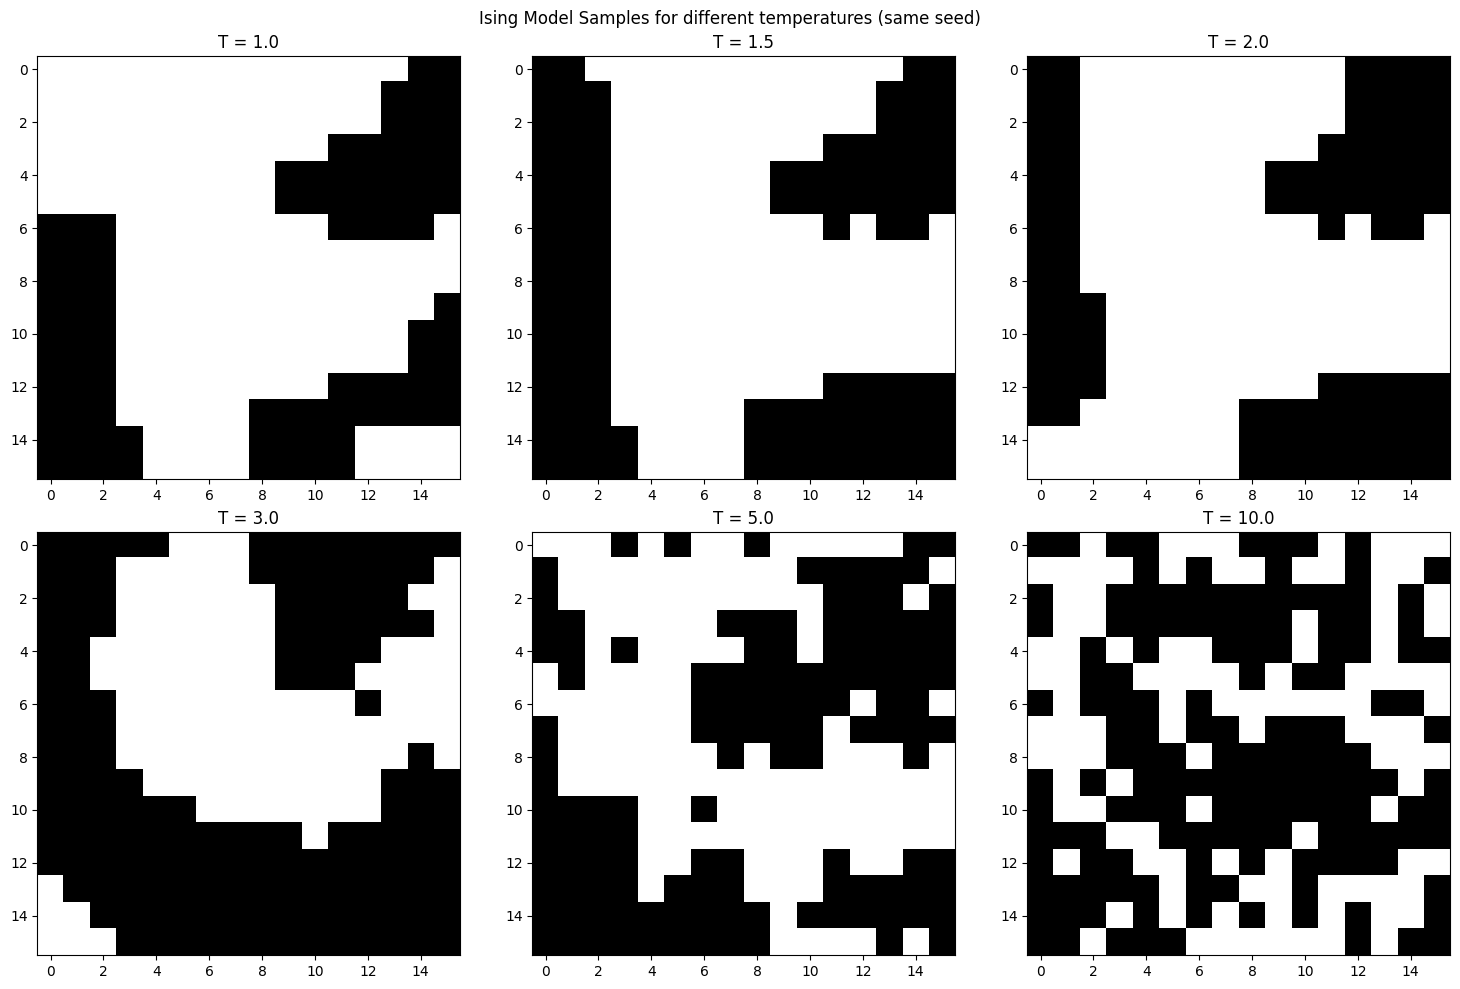

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

temperatures = [1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
samples_per_grid = 5
samples_per_grid = 10

width = 16
# width = 30
height = 16
# height = 30

for i in range(2):
    for j in range(3):
        np.random.seed(0)
        temperature = temperatures[i * 3 + j]
        model = IsingModel(width, height, random_init=True)
        model.sample_configuration(temperature, width * height * samples_per_grid)
        model.plot_grid(ax[i, j])
        ax[i, j].set_title(f'T = {temperature}')

fig.suptitle('Ising Model Samples for different temperatures (same seed)')
plt.tight_layout()
plt.show()


### (b)

In [4]:
width, height = 2, 2
configuration = np.ones((width, height), dtype=int).reshape(-1)

def compute_children(configuration: np.ndarray, index: int) -> List[np.ndarray]:
    configurations = []
    if index == -1:
        # evaluation_function(configuration.reshape(width, height))
        configurations.append(configuration.reshape(-1))
    else:
        # if it stays 1
        configurations.extend(compute_children(configuration.copy(), index-1))

        # if it flips to -1
        configuration[index] *= -1
        configurations.extend(compute_children(configuration.copy(), index-1))

    return configurations

            

In [5]:
configs =  compute_children(configuration, width*height - 1)
len(configs), configs[1], configs[-2]

(16, array([-1,  1,  1,  1]), array([ 1, -1, -1, -1]))

In [6]:
ground_truth_probabilities = dict()
T = 1.0

np.random.seed(0)

for config in configs:
    model = IsingModel(width, height, random_init=False)
    model.grid = config.reshape(width, height)
    ground_truth_probabilities[tuple(config.tolist())] = model.probability(T).item()

sum_ground_truth_probabilities = sum(ground_truth_probabilities.values())

for k in ground_truth_probabilities.keys():
    ground_truth_probabilities[k] /= sum_ground_truth_probabilities

# convert to log domain
for k in ground_truth_probabilities.keys():
    ground_truth_probabilities[k] = np.log(ground_truth_probabilities[k]).item()

ground_truth_probabilities

{(1, 1, 1, 1): -0.695158045717331,
 (-1, 1, 1, 1): -8.695158045717331,
 (1, -1, 1, 1): -8.695158045717331,
 (-1, -1, 1, 1): -8.695158045717331,
 (1, 1, -1, 1): -8.695158045717331,
 (-1, 1, -1, 1): -8.695158045717331,
 (1, -1, -1, 1): -16.69515804571733,
 (-1, -1, -1, 1): -8.695158045717331,
 (1, 1, 1, -1): -8.695158045717331,
 (-1, 1, 1, -1): -16.69515804571733,
 (1, -1, 1, -1): -8.695158045717331,
 (-1, -1, 1, -1): -8.695158045717331,
 (1, 1, -1, -1): -8.695158045717331,
 (-1, 1, -1, -1): -8.695158045717331,
 (1, -1, -1, -1): -8.695158045717331,
 (-1, -1, -1, -1): -0.695158045717331}

In [7]:
# sample from the distribution

num_samples = 100_000
samples_per_grids = [1, 5, 10, 20]
# samples_per_grids = [1]
# samples_per_grid = 10

results = dict()

for samples_per_grid in samples_per_grids:
    print(f'Sampling for {samples_per_grid} from {samples_per_grids}')
    np.random.seed(0)

    # 1. Monte Carlo Estimation
    monte_carlo_counts = ground_truth_probabilities.copy()
    for c in monte_carlo_counts.keys():
        monte_carlo_counts[c] = [0] * num_samples

    for i in tqdm(range(num_samples), desc=f'Computing sample probabilities using Monte Carlo'):
        model = IsingModel(width, height, random_init=True)
        model.sample_configuration(T, width * height * samples_per_grid, progress=False)

        config = tuple(model.grid.reshape(-1).tolist())
        monte_carlo_counts[config][i] += 1

    # * It turns out that this approach (commented out) also converges to the correct probabilities. 
    # * Using chatGPT to investigate this phenomenon, I found that the reason for this is that the Ergodic theorem
    # * guarantees the convergence to the true probabilities, however, with much higher variance. 
    # * Furthermore, the uncommented approach is statistically better, as it computes i.i.d. samples, whereas the samples of the commented out approach are correlated.

    # * It was very interesting to find this property, hence, I want to keep it in the code.

    # model = IsingModel(width, height, random_init=False)
    # for i in tqdm(range(num_samples), desc=f'Computing sample probabilities using Monte Carlo'):
    #     model.sample_configuration(T, 1, progress=False)

    #     config = tuple(model.grid.reshape(-1).tolist())
    #     monte_carlo_counts[config][i] += 1

    
    # 2. Estimate the log probabilities
    monte_carlo_probabilities = monte_carlo_counts.copy()

    for k in monte_carlo_probabilities.keys():
        counts = np.array(monte_carlo_counts[k])
        counts = np.cumsum(counts)

        if counts[-1] == 0:
            monte_carlo_probabilities[k] = np.nan
            continue

        x_steps = (counts > 0).nonzero()[0]
        y_steps = np.log(counts[x_steps]) - np.log(np.arange(1, num_samples + 1)[x_steps])
        monte_carlo_probabilities[k] = np.interp(np.arange(num_samples), x_steps, y_steps)  # interpolate for missing values

    results[samples_per_grid] = monte_carlo_probabilities

Sampling for 1 from [1, 5, 10, 20]


Computing sample probabilities using Monte Carlo: 100%|██████████| 100000/100000 [00:04<00:00, 20337.49it/s]


Sampling for 5 from [1, 5, 10, 20]


Computing sample probabilities using Monte Carlo: 100%|██████████| 100000/100000 [00:17<00:00, 5654.52it/s]


Sampling for 10 from [1, 5, 10, 20]


Computing sample probabilities using Monte Carlo: 100%|██████████| 100000/100000 [00:32<00:00, 3036.62it/s]


Sampling for 20 from [1, 5, 10, 20]


Computing sample probabilities using Monte Carlo: 100%|██████████| 100000/100000 [01:04<00:00, 1557.90it/s]


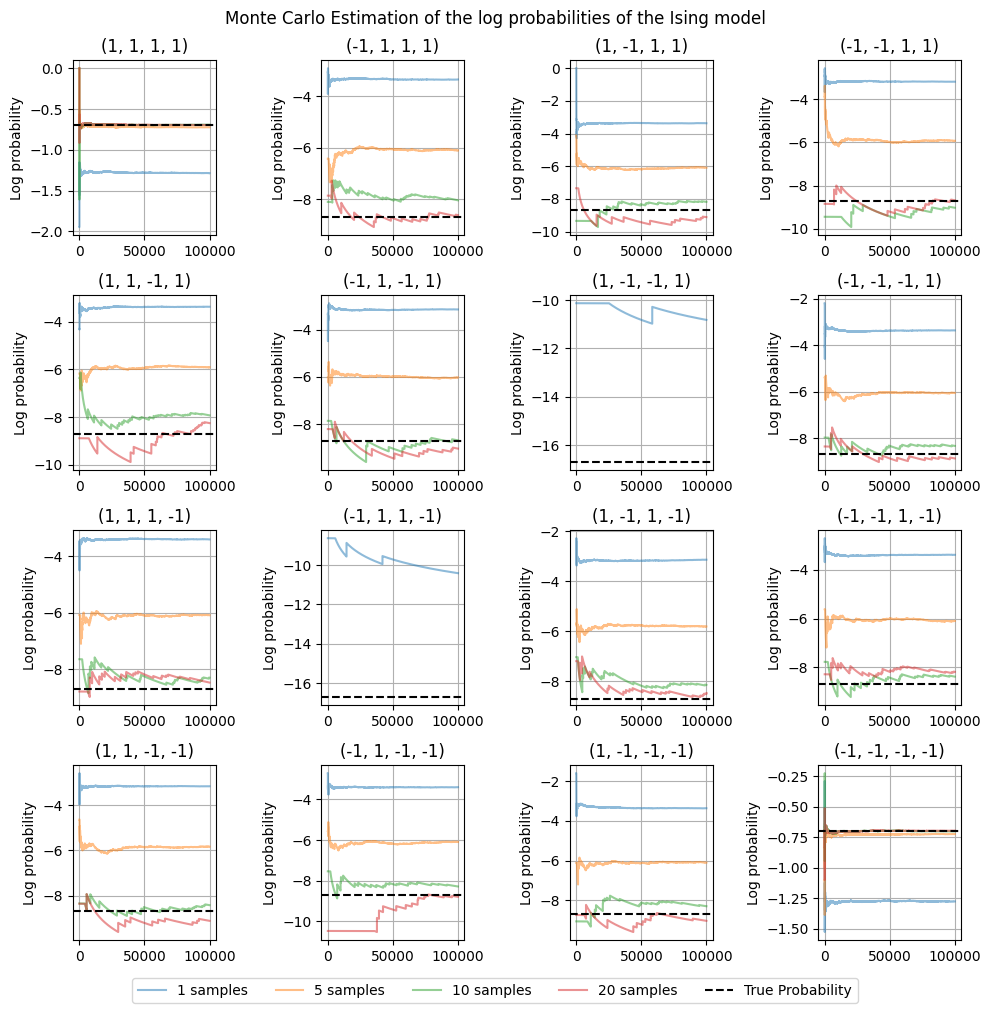

In [8]:

# ! BECAUSE I WANTED TO ADD THE LEGENDS TO THE BOTTOM OF THE PLOT, I USED CHATGPT TO HELP ME USE THE HANDLES 
# ! TO BE PLOTTED CORRECTLY. 
# ! Otherwise, the code has been written by me


fig, ax = plt.subplots(4, 4, figsize=(10, 10))

keys = list(monte_carlo_probabilities.keys())

# Store handles for legend
handles = []
labels = []

for i in range(4):
    for j in range(4):
        for idx, samples_per_grid in enumerate(samples_per_grids):
            # Only add handles for the first subplot
            line, = ax[i, j].plot(
                results[samples_per_grid][keys[i * 4 + j]],
                label=f'{samples_per_grid} samples',
                alpha=0.5
            )
            if i == 0 and j == 0:
                handles.append(line)
                labels.append(f'{samples_per_grid} samples')

        ground_truth_line = ax[i, j].axhline(
            ground_truth_probabilities[keys[i * 4 + j]],
            # color='red',
            color='black',
            linestyle='--',
            label='True Probability'
        )
        if i == 0 and j == 0:
            handles.append(ground_truth_line)
            labels.append('True Probability')

        ax[i, j].set_title(f'{keys[i * 4 + j]}')
        ax[i, j].grid(True)

        # ax[i, j].set_xlabel('Number of samples')
        ax[i, j].set_ylabel('Log probability')

# Create a single legend below the plots
fig.suptitle('Monte Carlo Estimation of the log probabilities of the Ising model')
fig.legend(handles, labels, loc='lower center', ncol=len(handles), bbox_to_anchor=(0.5, -0.02))
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)
plt.show()


**Conclusion**:
Using Monte-Carlo simulation, we observe that the probability of sampling the different probabilities are indeed proportional to their true probability. Furthermore, the longer we let the chain run, the better the estimation of the probabilities.

We note that the case where 
```
[[-1, 1], 
 [1 ,-1]]
 ```
and is oposite (which have a very low probability of being sampled), are only being sampled with using short MCMC chains. In our case, we observe that we are only able to sample these configurations when using chains of size 4 (2 x 2). 

This makes sense as their probability are very low, and therefore the probability of sampling a more likely configuration increases the longer the chains. Decreasing the length of the chains, by, for example, not makeing them dependent on the size of the grid, could allow to sample less likely configurations.

However, we observe that the estimation of all other configurations does not converge to the the right probability if we use chains that are too short. 


In [9]:
class IsingModelCurie(IsingModel):

    def magnetization(self) -> float:
        return np.abs(np.sum(self.grid)) / (self.n * self.m)

#### Ground Truth for 2x2 grid

In [10]:
width, height = 4, 4

def compute_ground_truth_magnetization(width: int, height: int) -> List[float]:
    means = []
    configuration = np.ones((width, height), dtype=int).reshape(-1)
    configs =  compute_children(configuration, width*height - 1)
    # len(configs), configs[1], configs[-2]

    for T in tqdm(np.arange(1.0, 5.0, 0.1), desc='Computing ground truth magnetization', total=len(np.arange(1.0, 5.0, 0.1))):

        ground_truth_probabilities = dict()
        magnetization = dict()

        np.random.seed(0)

        for config in configs:
            model = IsingModelCurie(width, height, random_init=False)
            model.grid = config.reshape(width, height)
            ground_truth_probabilities[tuple(config.tolist())] = model.probability(T).item()
            magnetization[tuple(config.tolist())] = model.magnetization()


        sum_ground_truth_probabilities = sum(ground_truth_probabilities.values())

        for k in ground_truth_probabilities.keys():
            ground_truth_probabilities[k] /= sum_ground_truth_probabilities

        mean = 0.0
        for k in ground_truth_probabilities.keys():
            mean += ground_truth_probabilities[k] * magnetization[k]

        means.append(mean)
    return np.array(means)


Computing ground truth magnetization: 100%|██████████| 40/40 [00:00<00:00, 12034.44it/s]


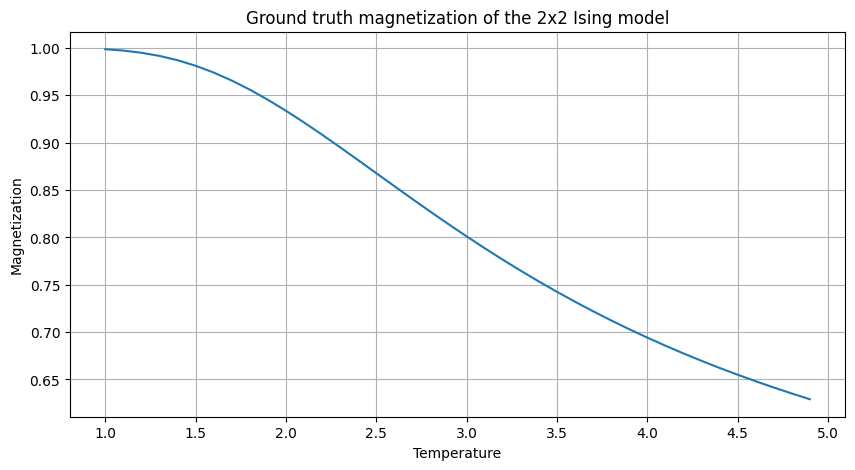

In [11]:
means = compute_ground_truth_magnetization(2, 2)
# print(means)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(1.0, 5.0, 0.1), means)
ax.set_xlabel('Temperature')
ax.set_ylabel('Magnetization')
ax.set_title('Ground truth magnetization of the 2x2 Ising model')
ax.grid(True)
# ax.legend()
plt.show()

Computing ground truth magnetization: 100%|██████████| 40/40 [00:30<00:00,  1.30it/s]


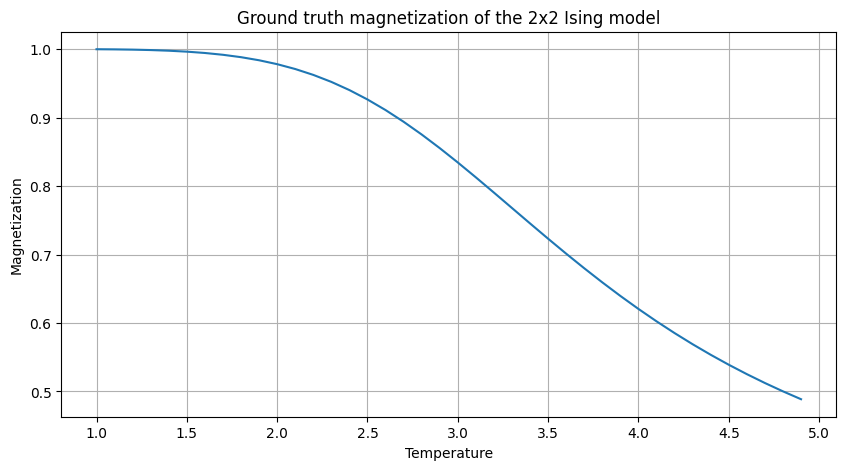

In [12]:
means = compute_ground_truth_magnetization(4, 4)
# print(means)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(1.0, 5.0, 0.1), means)
ax.set_xlabel('Temperature')
ax.set_ylabel('Magnetization')
ax.set_title('Ground truth magnetization of the 2x2 Ising model')
ax.grid(True)
# ax.legend()
plt.show()

In [16]:
num_runs = 1

start_temperature = 1.0
end_temperature = 5.0
step_size = 0.1

width, height = 16, 16
num_samples = width * height * 1_000
# num_samples = (width * height)**2

magnetizations = np.empty((num_runs, int((end_temperature - start_temperature) / step_size)))

model = IsingModelCurie(width, height, random_init=True)
pbar = tqdm(desc='Running simulations', total=magnetizations.shape[0] * magnetizations.shape[1])
for i in range(num_runs):
    for j, T in enumerate(np.arange(start_temperature, end_temperature, step_size)):
        np.random.seed(i)
        model.reset()

        model.sample_configuration(T, num_samples, progress=False)

        magnetizations[i, j] = model.magnetization()

        pbar.update(1)

Running simulations: 100%|██████████| 40/40 [54:51<00:00, 82.29s/it]


KeyboardInterrupt: 

In [ ]:
# function obtained from another assignment
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    return np.convolve(y, box, mode='valid')

# magnetizations_smoothed = magnetizations.copy()
smoothed = []
for i in range(magnetizations.shape[0]):
    smoothed.append(smooth(magnetizations[i], 5))
smoothed = np.array(smoothed)
smoothed.shape

(1, 36)

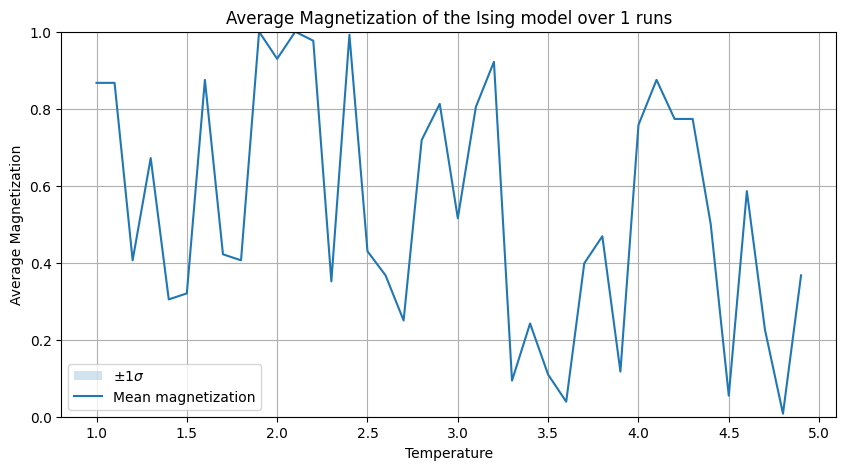

In [ ]:
means = magnetizations.mean(axis=0)
# means = smoothed.mean(axis=0)
stds = magnetizations.std(axis=0)
# stds = smoothed.std(axis=0)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# ax.fill_between(np.arange(start_temperature, end_temperature, step_size), np.subtract(means, stds), np.add(means, stds), alpha=0.2, label='$\\pm 1 \\sigma$')
ax.fill_between(np.arange(start_temperature, end_temperature, step_size)[:len(means)], np.subtract(means, stds), np.add(means, stds), alpha=0.2, label='$\\pm 1 \\sigma$')
# plt.plot(np.arange(start_temperature, end_temperature, step_size), means, label='Mean magnetization')
plt.plot(np.arange(start_temperature, end_temperature, step_size)[:len(means)], means, label='Mean magnetization')

ax.set_xlabel('Temperature')
ax.set_ylabel('Average Magnetization')

ax.set_title(f'Average Magnetization of the Ising model over {num_runs} runs')

ax.set_ylim(0, 1)

ax.grid(True)
ax.legend()

### (d)

In [ ]:
grid_sizes = [2, 6, 8, 10, 12, 16]
# grid_size = [16]

num_runs = 12

start_temperature = 1.0
end_temperature = 5.0
step_size = 0.5

magnetizations = np.empty((len(grid_sizes), num_runs, int((end_temperature - start_temperature) / step_size)))

for gid, grid_size in enumerate(grid_sizes):
    width, height = grid_size, grid_size
    num_samples = width * height * 10


    model = IsingModelCurie(width, height, random_init=True)
    pbar = tqdm(desc=f'Running simulations for grid size: {grid_size} x {grid_size}', total=magnetizations.shape[1] * magnetizations.shape[2])
    for i in range(num_runs):
        for j, T in enumerate(np.arange(start_temperature, end_temperature, step_size)):
            np.random.seed(i)
            model.reset()

            model.sample_configuration(T, num_samples, progress=False)

            magnetizations[gid, i, j] = model.magnetization()

            # print('Meow')
            pbar.update(1)

In [ ]:
means = magnetizations.mean(axis=1)
stds = magnetizations.std(axis=1)

fig, axs = plt.subplots(means.shape[0], 1, figsize=(10, 15))

for i in range(means.shape[0]):
    ax = axs[i]
    ax.fill_between(np.arange(start_temperature, end_temperature, step_size), np.subtract(means[i], stds[i]), np.add(means[i], stds[i]), alpha=0.2, label='$\\pm 1 \\sigma$')
    ax.plot(np.arange(start_temperature, end_temperature, step_size), means[i], label='Mean magnetization')

    ax.set_xlabel('Temperature')
    ax.set_ylabel('Average Magnetization')

    ax.set_title(f'Average Magnetization of the Ising model over {num_runs} runs')

    ax.set_ylim(0, 1)

    ax.grid(True)
    ax.legend()

# Debugging

In [2]:
x = np.array([0, 1, 0, 0, 1, 0, 0, 0])

x.T @ x

np.int64(2)